In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import pandas as pd
import os

!pip install igraph
import igraph as ig

!pip install --upgrade scipy networkx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount("/content/drive/")
%cd drive/My Drive/Colab Notebooks/Learning From Network

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Learning From Network


# Methods

In [ ]:
# function that return a dictionary of genres

def read_genre_map():
    path = 'Datasets/Genre Mapping/spotify_genre_mapping.csv'
    df = pd.read_csv(path, sep = '	')
    
    genre_map = {}
    
    for i in range(len(df.index)):        
        genre_map[df.iloc[i][0]] = df.iloc[i][1]
    
    
    return genre_map

In [ ]:
def parse_list_elements(songs):
    songs = songs[1:-1]
    songs = songs.split(", ")
    cut_songs = []
    for song in songs:
        cut_songs.append(song[1:-1])
    return cut_songs


In [ ]:
# dict of artist information
def read_artist_info():
    # fixed path
    path = 'Datasets/Artists/spotify_artists_info_complete_reduced_genres.csv'
    
    df = pd.read_csv(path, sep = '	')
    
    artist_map = {}
    
    for i in range(len(df.index)):
        attr = []
        attr.append(df.iloc[i][1]) # name
        attr.append(df.iloc[i][2]) # number of followers
        attr.append(parse_list_elements(df.iloc[i][4])) # genres of the artist (list)
        
        artist_map[df.iloc[i][0]] = attr
    
    return artist_map

In [ ]:
def draw(G, pos, measures, measure_name):
    
    nodes = nx.draw_networkx_nodes(G, pos, node_size=250, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=measures.keys())
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1, base=10))
    edges = nx.draw_networkx_edges(G, pos)

    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()


In [ ]:
#function to read artist networks
#INPUT: file name
def read_artist_dataset(path):
    art_graph = nx.Graph()
    
    #read
    df = pd.read_csv(path, sep = '	')
    
    #create graph
    for i in range(len(df.index)):
        #artist 1
        art_graph.add_node(df.iloc[i][0])
        #artist 2
        art_graph.add_node(df.iloc[i][1])
        #parsing of songs id
        songs = parse_list_elements(df.iloc[i][3])
        art_graph.add_edge(df.iloc[i][0], df.iloc[i][1], weight = int(df.iloc[i][2]), songs_list = songs)
    return art_graph
    

In [ ]:
def read_artist_datasets(directory):
    art_graph = nx.Graph()
    
    for filename in os.listdir(directory):
        path = os.path.join(directory,filename)
        
        if os.path.isfile(path) and path.endswith('.csv'):
            df = pd.read_csv(path, sep = '	')
            
            #create graph
            for i in range(len(df.index)):
                art_graph.add_node(df.iloc[i][0])
                art_graph.add_node(df.iloc[i][1]) 
                #parsing
                songs = parse_list_elements(df.iloc[i][3])
                art_graph.add_edge(df.iloc[i][0], df.iloc[i][1], weight = int(df.iloc[i][2]), songs_list = songs)
    return art_graph

In [ ]:
# function to read hit songs network
# ritorna una dict con solo alcuni dei parametri in song hits
# guardate se vale la pena aggiungerne altri
def read_song_dataset(path):
    df = pd.read_csv(path, sep = '	')
    
    dict_of_song_prop = {}
    
    for i in range(len(df.index)):
        song_prop = []
        #song_prop.append(df.iloc[i][1]) # song name
        song_prop.append(parse_list_elements(df.iloc[i][2])) # artist id (list)
        song_prop.append(parse_list_elements(df.iloc[i][3])) # artist name (list)
        song_prop.append(df.iloc[i][4]) # popularity
        song_prop.append(df.iloc[i][11]) # duration (ms)
        
        
        dict_of_song_prop[df.iloc[i][1]] = song_prop.copy()
    
    
    return dict_of_song_prop

In [ ]:
def read_genre_dataset(path):
    genre_graph = nx.Graph()
    
    #read
    df = pd.read_csv(path, sep = '	')
    
    #create graph
    for i in range(len(df.index)):
        print("indice = ", i)
        #genre1
        genre_graph.add_node(df.iloc[i][0])
        #genre2
        genre_graph.add_node(df.iloc[i][1]) 
        #edges
        genre_graph.add_edge(df.iloc[i][0], df.iloc[i][1], weight = int(df.iloc[i][2]), avg_streams = df.iloc[i][3])
    return genre_graph

# Artist Collaboration Network
---
1.   Australia
2.   Brazil
3.   Canada
4.   Germany
5.   France
6.   United Kingdom
7.   Japan
8.   United States of America
9.   Global (17/18/19)




> Australia



Graph with 385 nodes and 612 edges




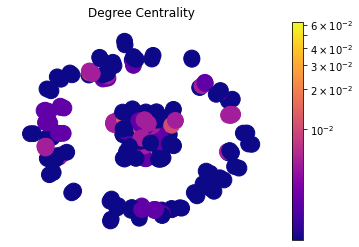

Centralities in descending order by value
Ed Sheeran :  0.0625
Post Malone :  0.057291666666666664
Khalid :  0.05208333333333333
Travis Scott :  0.046875
Cardi B :  0.046875
Tyga :  0.041666666666666664
Dreamville :  0.03645833333333333
Bas :  0.03125
JID :  0.03125
The Chainsmokers :  0.028645833333333332
Young Thug :  0.028645833333333332
Drake :  0.028645833333333332
Kanye West :  0.028645833333333332
DJ Khaled :  0.028645833333333332
A Boogie Wit da Hoodie :  0.026041666666666664
Chris Brown :  0.026041666666666664
Nicki Minaj :  0.026041666666666664
Ty Dolla $ign :  0.026041666666666664
Justin Bieber :  0.026041666666666664
Diplo :  0.026041666666666664
J Balvin :  0.0234375
J. Cole :  0.0234375
Beyoncé :  0.0234375
Marshmello :  0.0234375
Buddy :  0.0234375
Guapdad 4000 :  0.0234375
Jace :  0.0234375
Mez :  0.0234375
Reese LAFLARE :  0.0234375
Ski Mask The Slump God :  0.0234375
Smokepurpp :  0.0234375
Swae Lee :  0.020833333333333332
Juice WRLD :  0.020833333333333332
Offset :  

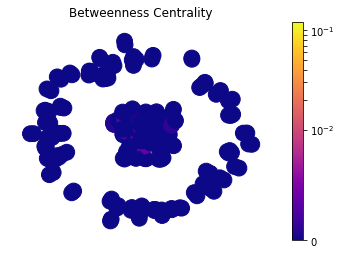

Centralities in descending order by value
Khalid :  0.120058588434607
Ed Sheeran :  0.08942699677552159
Ty Dolla $ign :  0.08892387950226453
Post Malone :  0.08204855638938223
Cardi B :  0.07559306774558357
A Boogie Wit da Hoodie :  0.05680224580486776
Camila Cabello :  0.047539044965796536
The Chainsmokers :  0.04604286615019453
DaBaby :  0.042048929677874956
Marshmello :  0.03978375544173248
Zedd :  0.03600122306867181
Kanye West :  0.03282190377983594
Dreamville :  0.030037553882589597
Halsey :  0.02922435048929305
DJ Khaled :  0.02911665747702373
Travis Scott :  0.02631115715858387
Offset :  0.02533988462775999
Diplo :  0.024817364326074336
Beyoncé :  0.024751179883360046
Martin Garrix :  0.024423204699114416
Shawn Mendes :  0.02425471142432103
Kygo :  0.024214929389945704
Nicki Minaj :  0.02398194778161638
Drake :  0.023275108072350243
Selena Gomez :  0.02232705876406346
Tiësto :  0.021742794227699584
Young Thug :  0.02161612531007948
benny blanco :  0.020192804401049355
Kehlani :

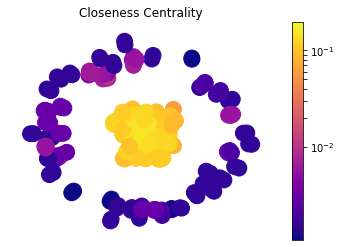

Centralities in descending order by value
Post Malone :  0.19451623141095395
Khalid :  0.1924224076067456
Cardi B :  0.1915974455162558
Ty Dolla $ign :  0.18737989168413696
Ed Sheeran :  0.1865975121781489
A Boogie Wit da Hoodie :  0.18543611687413553
DJ Khaled :  0.18002056059080226
21 Savage :  0.17457071940104166
Young Thug :  0.17355380258899675
Camila Cabello :  0.17221620102761723
J Balvin :  0.17106259968102072
French Montana :  0.1694411532385466
Offset :  0.16912054556922107
benny blanco :  0.16912054556922107
Travis Scott :  0.16864190251572325
Halsey :  0.1684829563305058
Meek Mill :  0.1672220922980979
Selena Gomez :  0.16690981948334888
Marshmello :  0.1667541200248756
Quavo :  0.16567230460302748
6ix9ine :  0.16490813345633457
Rvssian :  0.16475614439324116
Diplo :  0.1644530052131248
Kanye West :  0.16430185355392157
Chris Brown :  0.1631025699513382
6LACK :  0.16295388939532054
Lil Nas X :  0.16032324364723466
Bad Bunny :  0.1597501489425082
Justin Bieber :  0.158335178

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/au/au-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Brazil



Graph with 388 nodes and 694 edges




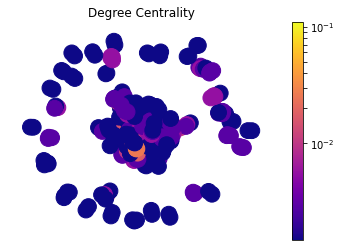

Centralities in descending order by value
Anitta :  0.10852713178294573
Pineapple StormTv :  0.09043927648578812
Salve Malak :  0.07751937984496124
MC Kevin o Chris :  0.04909560723514212
Bob do Contra :  0.043927648578811374
Xamã :  0.043927648578811374
Ludmilla :  0.03875968992248062
Vitão :  0.03875968992248062
Ducon :  0.03875968992248062
Kayuá :  0.03875968992248062
J Balvin :  0.03875968992248062
Chris MC :  0.03617571059431525
Azzy :  0.03617571059431525
Orochi :  0.03359173126614987
Alok :  0.031007751937984496
César Mc :  0.031007751937984496
Marília Mendonça :  0.031007751937984496
Maria :  0.031007751937984496
Matuê :  0.031007751937984496
Cynthia Luz :  0.031007751937984496
MC Kevinho :  0.028423772609819122
MC Hariel :  0.028423772609819122
MC Cabelinho :  0.028423772609819122
Filipe Ret :  0.028423772609819122
Post Malone :  0.02583979328165375
Delacruz :  0.02583979328165375
Dudu :  0.02583979328165375
MODE$TIA :  0.02583979328165375
Maquiny :  0.02583979328165375
Wesley

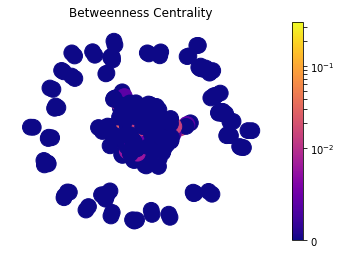

Centralities in descending order by value
Anitta :  0.3368435613114173
Vitão :  0.08285102615459125
Wesley Safadão :  0.07309987381348511
Cardi B :  0.07065932306547548
Matheus & Kauan :  0.06373074624829492
MC Kevin o Chris :  0.061041869093033566
MC Kevinho :  0.05979655140436409
Ozuna :  0.054860234274540724
Dennis DJ :  0.053924439687983106
MC Cabelinho :  0.05022622356794837
Ludmilla :  0.04646415871725102
Luísa Sonza :  0.04566259745036161
Luan Santana :  0.04470319756752805
Alok :  0.04013792075506339
DJ Snake :  0.03885843629298623
Marília Mendonça :  0.03867450666048963
Lexa :  0.03694911363349866
Camila Cabello :  0.03458600282313982
Jorge & Mateus :  0.033847978192644144
MC Kekel :  0.033532626078261754
Pineapple StormTv :  0.03240379349025661
Ed Sheeran :  0.03087922214547826
Gusttavo Lima :  0.03067887556279734
Pabllo Vittar :  0.028516135755963824
Leo Santana :  0.027974335835933423
Salve Malak :  0.026949586793694805
Papatinho :  0.02492371712643298
Post Malone :  0.0245

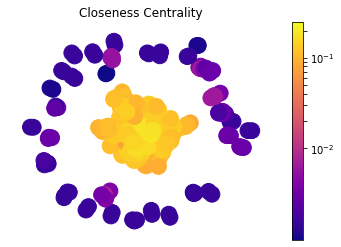

Centralities in descending order by value
Anitta :  0.24613493080806761
Vitão :  0.21326896051498256
Luísa Sonza :  0.20681848155800767
Wesley Safadão :  0.20642825800789819
MC Kevinho :  0.20565221192516173
Lexa :  0.2046903213174669
MC Cabelinho :  0.20392726326968508
Marília Mendonça :  0.20373738686068166
Matheus & Kauan :  0.20260551248923342
Papatinho :  0.20056274380235756
Ozuna :  0.19802167736504261
Leo Santana :  0.19712968782736223
DJ Snake :  0.1967751380291116
Dennis DJ :  0.19659834095990306
Mc Rebecca :  0.1964218613001545
MC G15 :  0.19519531979337384
Gustavo Mioto :  0.19450129198966407
MC Kevin o Chris :  0.1939840013194788
Tainy :  0.19278762421883006
Sean Paul :  0.19077066563938283
DJ Zullu :  0.1883080494736421
Maluma :  0.187984496124031
DJ Yuri Martins :  0.1870204730669847
Maejor :  0.1870204730669847
Madonna :  0.18686076301312735
Pineapple StormTv :  0.18654215983663436
Swae Lee :  0.18654215983663436
Major Lazer :  0.1863832653222931
Salve Malak :  0.1860662

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/br/br-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Canada



Graph with 442 nodes and 876 edges




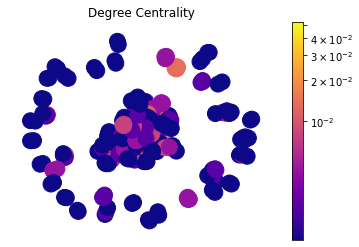

Centralities in descending order by value
Ed Sheeran :  0.05215419501133787
Post Malone :  0.049886621315192746
DJ Khaled :  0.049886621315192746
Tyga :  0.04761904761904762
Travis Scott :  0.045351473922902494
J Balvin :  0.04308390022675737
Drake :  0.04308390022675737
DaBaby :  0.04308390022675737
Offset :  0.04308390022675737
Young Thug :  0.04081632653061225
Lil Baby :  0.04081632653061225
A Boogie Wit da Hoodie :  0.04081632653061225
Cardi B :  0.04081632653061225
Khalid :  0.04081632653061225
Gunna :  0.03854875283446712
Dreamville :  0.03854875283446712
Nicki Minaj :  0.03854875283446712
Chance the Rapper :  0.03854875283446712
Swae Lee :  0.036281179138321996
Juice WRLD :  0.036281179138321996
Daddy Yankee :  0.036281179138321996
Meek Mill :  0.034013605442176874
Chris Brown :  0.034013605442176874
Gucci Mane :  0.034013605442176874
YG :  0.02947845804988662
XXXTENTACION :  0.02947845804988662
Tory Lanez :  0.02947845804988662
Marshmello :  0.02947845804988662
Ty Dolla $ign : 

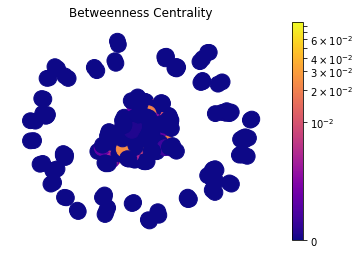

Centralities in descending order by value
Ty Dolla $ign :  0.0869692716915997
Khalid :  0.07848978916739562
Drake :  0.060152170102786236
Nicki Minaj :  0.06000204662599793
J Balvin :  0.05809122609170766
Ed Sheeran :  0.052715940704584026
Daddy Yankee :  0.05174216328643625
Chris Brown :  0.048061086427075066
XXXTENTACION :  0.04679398322999717
Post Malone :  0.046517861647631276
Marshmello :  0.04651033649843669
Swae Lee :  0.0409426250901306
A Boogie Wit da Hoodie :  0.040825098993682786
DaBaby :  0.04027672400050912
Juice WRLD :  0.039653540865556336
DJ Khaled :  0.03841215143094741
Cardi B :  0.03615124602024378
Gucci Mane :  0.0355193769985459
The Chainsmokers :  0.03483117076631934
Chance the Rapper :  0.034038649745884074
Zedd :  0.0296450374138052
Diplo :  0.029340446776813665
Lil Wayne :  0.029250034083520365
Lil Peep :  0.023881673881673882
Ariana Grande :  0.022833554665605677
Meek Mill :  0.022740376251652754
Selena Gomez :  0.022456599133933705
Young Thug :  0.02210272253

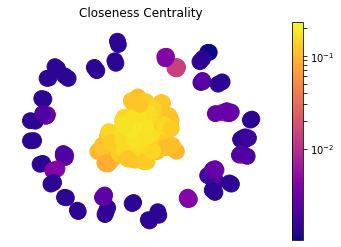

Centralities in descending order by value
Ty Dolla $ign :  0.22966018558723728
Nicki Minaj :  0.22351741962243626
Post Malone :  0.22313237669457678
J Balvin :  0.22313237669457678
Cardi B :  0.22236625694626921
Chris Brown :  0.22236625694626921
DJ Khaled :  0.2221755483211009
Khalid :  0.22160538010470798
A Boogie Wit da Hoodie :  0.2176946969263896
Drake :  0.2173294373677883
Meek Mill :  0.2153422189047412
Lil Wayne :  0.2153422189047412
Offset :  0.21339101263789428
Gunna :  0.2119940174651421
DaBaby :  0.21147484844277847
Ed Sheeran :  0.21113014616332815
Quavo :  0.21061519458732003
Big Sean :  0.20993248731151024
J. Cole :  0.20959279073010006
Young Thug :  0.20925419171438098
Gucci Mane :  0.2089166849535513
French Montana :  0.20807766212241255
YG :  0.20691428861214348
Marshmello :  0.20641967278279175
Rich The Kid :  0.20543750146106554
21 Savage :  0.20527471421743554
Swae Lee :  0.20446463247229962
benny blanco :  0.20318171713129696
Chance the Rapper :  0.201130969986338

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/ca/ca-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Germany



Graph with 555 nodes and 886 edges




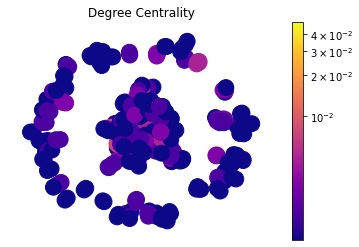

Centralities in descending order by value
Capital Bra :  0.048736462093862815
Ed Sheeran :  0.04151624548736462
Post Malone :  0.036101083032490974
David Guetta :  0.03429602888086643
Nimo :  0.03068592057761733
Gringo :  0.03068592057761733
Luciano :  0.03068592057761733
RAF Camora :  0.02888086642599278
Ufo361 :  0.02888086642599278
J Balvin :  0.02888086642599278
Farid Bang :  0.02888086642599278
Kontra K :  0.02707581227436823
Gzuz :  0.025270758122743684
Tyga :  0.025270758122743684
Kool Savas :  0.025270758122743684
Sido :  0.025270758122743684
Travis Scott :  0.025270758122743684
Samra :  0.023465703971119134
Cardi B :  0.023465703971119134
Maxwell :  0.021660649819494587
Bonez MC :  0.021660649819494587
Daddy Yankee :  0.021660649819494587
King Khalil :  0.019855595667870037
Eno :  0.019855595667870037
Veysel :  0.019855595667870037
Olexesh :  0.019855595667870037
Trettmann :  0.018050541516245487
Summer Cem :  0.018050541516245487
Khalid :  0.018050541516245487
Dardan :  0.018

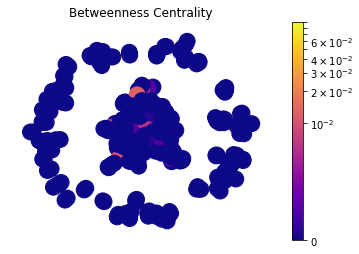

Centralities in descending order by value
Capital Bra :  0.09002876778630674
6ix9ine :  0.08374040973321178
Nicki Minaj :  0.0822980908352324
A Boogie Wit da Hoodie :  0.07809155844648631
David Guetta :  0.07401411070092871
Ed Sheeran :  0.07164157855867433
Farid Bang :  0.06973852482728639
Lil Baby :  0.0681169031410355
Post Malone :  0.06524267965726294
Veysel :  0.06431334371726337
Diplo :  0.0595495849587492
Ufo361 :  0.055681307266741684
Cardi B :  0.04706513423992023
Gringo :  0.04524617817981396
Bausa :  0.04475097459046777
Tiësto :  0.039387743667321395
Luciano :  0.03781605518004339
Nimo :  0.03780741353662038
Khalid :  0.03327408409231845
Tyga :  0.0312967754831556
French Montana :  0.031022853157044648
Gunna :  0.030279525727209947
AriBeatz :  0.029231523230783808
J Balvin :  0.028711556378350364
18 Karat :  0.028325084741279035
Swae Lee :  0.028281849520123196
Marshmello :  0.02785717150874673
Jamule :  0.02687249287197968
Dardan :  0.025112604461140227
Sido :  0.0243532097

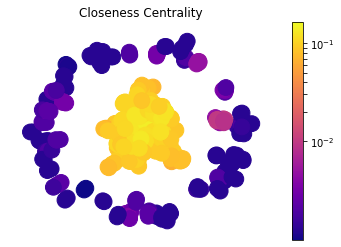

Centralities in descending order by value
A Boogie Wit da Hoodie :  0.16418873076633136
Lil Baby :  0.1639984773123727
Veysel :  0.1611049355954213
6ix9ine :  0.1608303249097473
Ufo361 :  0.1603747149241673
Gringo :  0.1574312412909651
Luciano :  0.155956678700361
Farid Bang :  0.15518715561466845
Ed Sheeran :  0.15467834526839086
Capital Bra :  0.1544251892204884
Gzuz :  0.14937275558900015
Kalazh44 :  0.1492152724518478
Capo :  0.14804465054453728
Summer Cem :  0.14788995393999751
Nicki Minaj :  0.14773558029287853
18 Karat :  0.14765851426247015
Gunna :  0.14742779783393503
Post Malone :  0.14704486848891182
Juju :  0.1467399542981624
Meek Mill :  0.1460584994020409
Nimo :  0.1451596778672591
Kontra K :  0.14478842549419707
French Montana :  0.14478842549419707
Cardi B :  0.14478842549419707
Hamza :  0.1445665841885369
Saucegod :  0.1445665841885369
KC Rebell :  0.14405158872323423
Jamule :  0.14310483915124128
AriBeatz :  0.14288812308993198
Tyga :  0.1428160301923084
The Cratez : 

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/de/de-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> France



Graph with 418 nodes and 622 edges




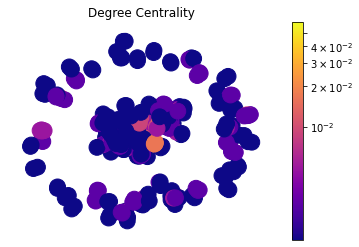

Centralities in descending order by value
Ninho :  0.05995203836930455
Jul :  0.04796163069544364
J Balvin :  0.04556354916067146
Dadju :  0.03836930455635491
David Guetta :  0.03836930455635491
Nekfeu :  0.03357314148681055
Koba LaD :  0.031175059952038366
Lacrim :  0.031175059952038366
Diplo :  0.026378896882494004
Heuss L'enfoiré :  0.026378896882494004
Niska :  0.026378896882494004
Roméo Elvis :  0.026378896882494004
Daddy Yankee :  0.026378896882494004
Post Malone :  0.02398081534772182
Cardi B :  0.02398081534772182
Landy :  0.02398081534772182
SCH :  0.02398081534772182
Gambi :  0.02398081534772182
Naps :  0.02398081534772182
Soolking :  0.02398081534772182
TK :  0.021582733812949638
Moubarak :  0.021582733812949638
RK :  0.021582733812949638
Sofiane :  0.021582733812949638
Alonzo :  0.021582733812949638
Maes :  0.021582733812949638
Ed Sheeran :  0.021582733812949638
Hamza :  0.021582733812949638
Vald :  0.021582733812949638
Gips :  0.021582733812949638
A-Deal :  0.0215827338129

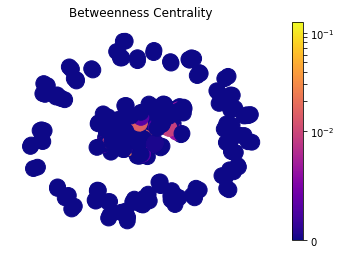

Centralities in descending order by value
J Balvin :  0.1277933924403872
Diplo :  0.09887102749498225
Niska :  0.0930175941078259
Ninho :  0.07877435809245086
Cardi B :  0.07040133511793863
Lacrim :  0.06638334837297818
Dadju :  0.059288830362917794
Jul :  0.05299902121527812
Gradur :  0.051797039277837256
Soolking :  0.046984077053865946
Lartiste :  0.04552135073886573
Alonzo :  0.04382897885566737
David Guetta :  0.04299732500431824
KAROL G :  0.04200283454948623
Ed Sheeran :  0.04164798120619895
Maître Gims :  0.041068394722284116
Landy :  0.03645132929939269
Heuss L'enfoiré :  0.03496360385599175
Kaaris :  0.03469688278937031
Nekfeu :  0.034328306585500824
SCH :  0.03354078032114178
Roméo Elvis :  0.03214255518661993
Drake :  0.03116728929815992
Damso :  0.02934137481769653
Maes :  0.02793346049748846
Vianney :  0.027808522412838956
Rick Ross :  0.027657525130191554
Vald :  0.02644267161787312
Alkpote :  0.02480300759648435
Sofiane :  0.023958426760874296
Hamza :  0.022760337216746

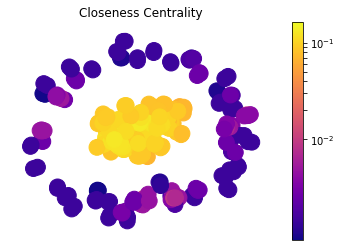

Centralities in descending order by value
Soolking :  0.16197394197318202
Niska :  0.16084125706427865
Dadju :  0.16070078435068538
Gradur :  0.16070078435068538
Ninho :  0.1586227569668403
Heuss L'enfoiré :  0.158213583905017
SCH :  0.1552762853008732
Landy :  0.15488417346930536
Alonzo :  0.15462386393406283
Jul :  0.15449403701220382
Lacrim :  0.15269908554484213
Koba LaD :  0.15106929234937172
Diplo :  0.1495954455947437
Lartiste :  0.1493525958454016
GLK :  0.14911053329135718
Hornet La Frappe :  0.14898979601743706
Soprano :  0.14850879586887392
Hamza :  0.14743781897558875
Maître Gims :  0.1462658172349243
Sofiane :  0.1451123013261315
Aya Nakamura :  0.14330404835010496
Naps :  0.14330404835010496
Vald :  0.14154030621656521
DA Uzi :  0.14154030621656521
Maes :  0.14035270639323782
J Balvin :  0.14003226642430347
Aymane Serhani :  0.13876500609467177
Kaly :  0.13876500609467177
Damso :  0.13845176680326168
KAROL G :  0.13824372508004115
Dosseh :  0.13762333439157426
Maluma :  0

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/fr/fr-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> United kingdom



Graph with 449 nodes and 770 edges




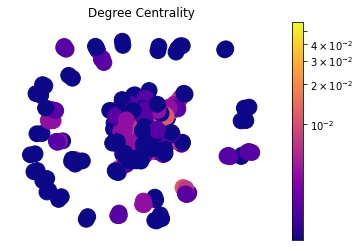

Centralities in descending order by value
Ed Sheeran :  0.05803571428571428
Post Malone :  0.049107142857142856
Aitch :  0.03794642857142857
Cardi B :  0.03794642857142857
DJ Khaled :  0.03794642857142857
Travis Scott :  0.03571428571428571
D-Block Europe :  0.03571428571428571
Krept & Konan :  0.033482142857142856
Skepta :  0.033482142857142856
Khalid :  0.033482142857142856
Tory Lanez :  0.03125
Stormzy :  0.02901785714285714
J Balvin :  0.026785714285714284
Lil Baby :  0.026785714285714284
French Montana :  0.026785714285714284
Young Thug :  0.024553571428571428
Drake :  0.024553571428571428
Chris Brown :  0.024553571428571428
Marshmello :  0.024553571428571428
A Boogie Wit da Hoodie :  0.024553571428571428
Tyga :  0.02232142857142857
Swarmz :  0.02232142857142857
Dappy :  0.02232142857142857
Dave :  0.02232142857142857
Russ Millions :  0.02232142857142857
Kanye West :  0.02232142857142857
Stefflon Don :  0.02232142857142857
Hugh Jackman :  0.020089285714285712
Fredo :  0.0200892857

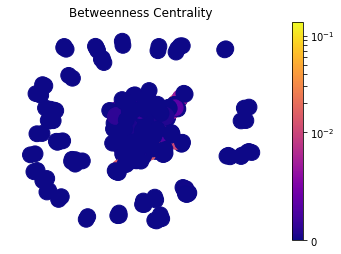

Centralities in descending order by value
Post Malone :  0.13716133049854934
Ed Sheeran :  0.116940709932798
French Montana :  0.1129587591385708
Khalid :  0.06942132178707637
Cardi B :  0.06936664316101496
A Boogie Wit da Hoodie :  0.06364313059982586
Sigala :  0.062468650604983154
Ty Dolla $ign :  0.059734283230560924
Tiësto :  0.05805151189889607
Marshmello :  0.05154420812841689
Young Thug :  0.0492447347053443
D-Block Europe :  0.047328077966904136
Skepta :  0.04630067821202932
Tory Lanez :  0.04522861616176471
DJ Khaled :  0.04522097792655625
Jax Jones :  0.04492437929598663
Aitch :  0.04296058733144792
Drake :  0.041874305596815625
Lil Baby :  0.03958247922510131
Swae Lee :  0.039423599237924156
Ella Henderson :  0.039378155225576465
benny blanco :  0.03918993976307309
Geko :  0.0387788144787661
Roddy Ricch :  0.03817626387709325
Offset :  0.03643637617268477
Chris Brown :  0.03628112503728427
J Hus :  0.03555407757153991
WizKid :  0.034779111811372915
Dave :  0.0344050536791861

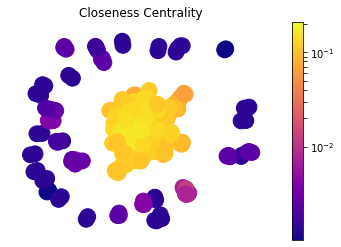

Centralities in descending order by value
Post Malone :  0.20785661803295893
Ed Sheeran :  0.20755161932711452
Cardi B :  0.20724751439037153
A Boogie Wit da Hoodie :  0.2012040235724446
French Montana :  0.20077562607725843
DJ Khaled :  0.19880032125288624
Young Thug :  0.19838208775796431
Meek Mill :  0.1942945447409733
J Balvin :  0.19296920678230364
Roddy Ricch :  0.1917917675544794
21 Savage :  0.1885952380952381
Drake :  0.18809365501519756
Offset :  0.1870984504913076
Tyga :  0.18648177794519258
Lil Baby :  0.1863589309241483
Chris Brown :  0.18417503720238096
J Hus :  0.18369666048237476
Rvssian :  0.18357745434319087
Khalid :  0.18322076239822352
Camila Cabello :  0.18322076239822352
Dave :  0.1823938472874643
Travis Scott :  0.18180774880646347
Swae Lee :  0.17927304001448488
Marshmello :  0.1783687623851558
Bad Bunny :  0.1782563687100549
Selena Gomez :  0.1782563687100549
D-Block Europe :  0.17814411658870097
Geko :  0.17792003593890385
The Plug :  0.17747356157017385
Tory 

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/gb/gb-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Japan



Graph with 198 nodes and 233 edges




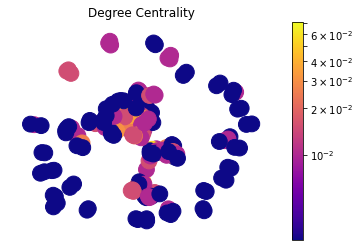

Centralities in descending order by value
Ed Sheeran :  0.07106598984771573
The Chainsmokers :  0.055837563451776644
J Balvin :  0.04568527918781726
Justin Bieber :  0.04568527918781726
Avicii :  0.04060913705583756
Ariana Grande :  0.04060913705583756
Khalid :  0.035532994923857864
Zedd :  0.035532994923857864
Marshmello :  0.035532994923857864
Ozuna :  0.035532994923857864
Selena Gomez :  0.035532994923857864
Cardi B :  0.035532994923857864
DJ Snake :  0.03045685279187817
Camila Cabello :  0.03045685279187817
Jonas Blue :  0.03045685279187817
Travis Scott :  0.03045685279187817
BTS :  0.03045685279187817
Chris Brown :  0.025380710659898477
Chance the Rapper :  0.025380710659898477
Martin Garrix :  0.025380710659898477
Daddy Yankee :  0.025380710659898477
benny blanco :  0.025380710659898477
Kygo :  0.025380710659898477
Diplo :  0.025380710659898477
Hailee Steinfeld :  0.025380710659898477
Tyga :  0.02030456852791878
Lennon Stella :  0.02030456852791878
Young Thug :  0.020304568527918

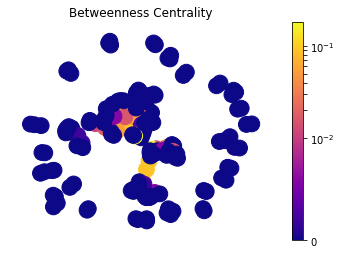

Centralities in descending order by value
The Chainsmokers :  0.1816792706930488
Halsey :  0.18059152595048172
Ty Dolla $ign :  0.09447840049725474
Ed Sheeran :  0.09402172036327236
Zedd :  0.09080078732000414
Kehlani :  0.09043820573914844
Khalid :  0.08910010704789535
benny blanco :  0.08718360440622941
Selena Gomez :  0.08643513242860587
Cardi B :  0.05719465451155084
BTS :  0.053739770019683
Ariana Grande :  0.04558168445042992
Marshmello :  0.04523377879070409
Camila Cabello :  0.04208363548465063
Kygo :  0.0364394488759971
Justin Bieber :  0.03025484305397287
Travis Scott :  0.025760558030318695
Lauv :  0.02206567906350357
DJ Snake :  0.02124987050657827
Hailee Steinfeld :  0.019303152733174487
Chris Brown :  0.018305190096343103
Anne-Marie :  0.017585206671501086
Shawn Mendes :  0.01740391588107324
Zara Larsson :  0.01740391588107324
J Balvin :  0.016747815877620083
Maroon 5 :  0.015989847715736038
Rita Ora :  0.014606857971615041
Lennon Stella :  0.013752201388169481
Jonas Blue

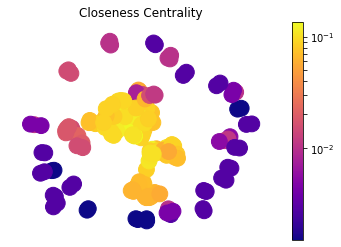

Centralities in descending order by value
Halsey :  0.13480317207917966
benny blanco :  0.1311171478426396
Khalid :  0.1290999609527528
Selena Gomez :  0.1288521683213656
The Chainsmokers :  0.12618793175832982
Cardi B :  0.11881766317775481
J Balvin :  0.11860773797779411
Ed Sheeran :  0.11839855325472921
Tainy :  0.11736360086613892
BTS :  0.11594469722872447
DJ Snake :  0.11514919330262688
Ozuna :  0.11397619642687856
Marshmello :  0.11282685663097726
Ty Dolla $ign :  0.11059634216710292
bülow :  0.10723958417800554
Diplo :  0.10706854815858288
Kygo :  0.10672810762389741
Death Stranding: Timefall :  0.10655869792925629
Major Lazer :  0.10655869792925629
Daddy Yankee :  0.10522253870757284
Lauv :  0.10522253870757284
Anuel AA :  0.10505787119785832
KAROL G :  0.10505787119785832
Camila Cabello :  0.10489371827411167
Anne-Marie :  0.10440432301000228
Coldplay :  0.10391947321274221
Winona Oak :  0.10391947321274221
Kelsea Ballerini :  0.10391947321274221
Justin Bieber :  0.1024915720

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/jp/jp-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> United States of America



Graph with 442 nodes and 967 edges




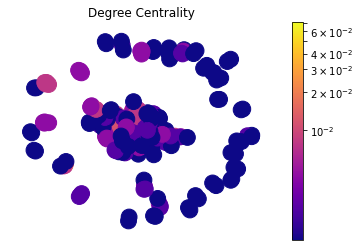

Centralities in descending order by value
Dreamville :  0.07029478458049887
Chance the Rapper :  0.06575963718820863
J Balvin :  0.05668934240362812
Young Thug :  0.05215419501133787
Post Malone :  0.05215419501133787
Ed Sheeran :  0.05215419501133787
DaBaby :  0.049886621315192746
A Boogie Wit da Hoodie :  0.049886621315192746
Gucci Mane :  0.049886621315192746
J. Cole :  0.04761904761904762
Tyga :  0.04761904761904762
Gunna :  0.045351473922902494
Meek Mill :  0.045351473922902494
Offset :  0.045351473922902494
YG :  0.04308390022675737
Lil Baby :  0.04308390022675737
Cardi B :  0.04308390022675737
Ty Dolla $ign :  0.04308390022675737
Travis Scott :  0.04081632653061225
Juice WRLD :  0.04081632653061225
DJ Khaled :  0.04081632653061225
Trippie Redd :  0.03854875283446712
Khalid :  0.03854875283446712
Nicki Minaj :  0.03854875283446712
Bad Bunny :  0.036281179138321996
JID :  0.036281179138321996
Bas :  0.036281179138321996
Anuel AA :  0.036281179138321996
Ozuna :  0.03401360544217687

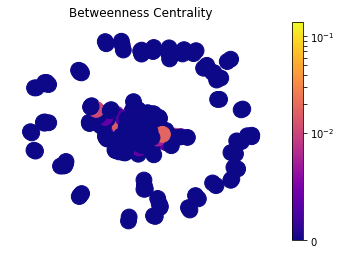

Centralities in descending order by value
Ty Dolla $ign :  0.13961847830461935
The Chainsmokers :  0.07566723296126857
Khalid :  0.07123941957159455
Nicki Minaj :  0.06460150367464773
Chance the Rapper :  0.055749159235096456
A Boogie Wit da Hoodie :  0.049175437615337325
Ed Sheeran :  0.04857468469224507
J Balvin :  0.04751537383738028
XXXTENTACION :  0.04687025216566059
Diplo :  0.04141547718158029
YG :  0.0380733032181942
Cardi B :  0.036384466248247635
Post Malone :  0.03635226638990437
Juice WRLD :  0.03549560467199683
J. Cole :  0.034770512335636494
Young Thug :  0.0342608687071156
DaBaby :  0.03319347743566478
Dreamville :  0.03316767485275011
Gucci Mane :  0.032011981786946704
Drake :  0.030450940081278872
Halsey :  0.028847461180649268
Swae Lee :  0.02855487862183706
The Weeknd :  0.028287808872224453
Meek Mill :  0.028202779841539256
Marshmello :  0.027487968087735275
Travis Scott :  0.027481251033887672
DJ Khaled :  0.026617424657139465
Offset :  0.024539829589985577
Chris B

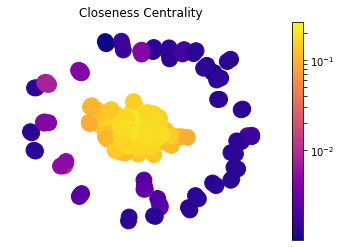

Centralities in descending order by value
Ty Dolla $ign :  0.2588795692243968
Nicki Minaj :  0.24582104228121923
YG :  0.24409295059558678
Khalid :  0.24409295059558678
A Boogie Wit da Hoodie :  0.24133603629693984
Post Malone :  0.2402921953094963
Gunna :  0.23660798788567103
Meek Mill :  0.2358045651763818
Cardi B :  0.23540489642184556
DJ Khaled :  0.23500658018424517
Offset :  0.23480792711561943
Young Thug :  0.23264470500651402
J. Cole :  0.2316745436011491
Gucci Mane :  0.23090422092915858
Lil Wayne :  0.23090422092915858
J Balvin :  0.22994849153789548
DaBaby :  0.22994849153789548
Megan Thee Stallion :  0.22900064120179536
Lil Baby :  0.22712819115108568
Ed Sheeran :  0.22657241254304875
Chris Brown :  0.22657241254304875
Juice WRLD :  0.22565213466919395
XXXTENTACION :  0.22492127755285649
Drake :  0.22419513944937672
Kanye West :  0.22311468094600623
21 Savage :  0.22133687472332889
2 Chainz :  0.22080904433845608
Kodak Black :  0.2206336598711499
ScHoolboy Q :  0.2202837254

In [ ]:
graph = read_artist_dataset("Datasets/Artist Collaboration Network/us/us-artist_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])

## Global





> Global 2017



Graph with 409 nodes and 680 edges




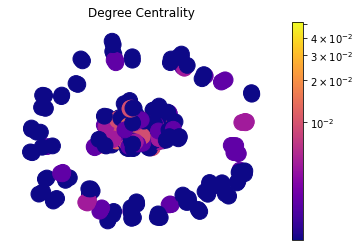

Centralities in descending order by value
Drake :  0.051470588235294115
J Balvin :  0.051470588235294115
Calvin Harris :  0.049019607843137254
Travis Scott :  0.04656862745098039
Future :  0.04656862745098039
Quavo :  0.041666666666666664
Nicki Minaj :  0.03676470588235294
Daddy Yankee :  0.03676470588235294
Logic :  0.03676470588235294
Lil Wayne :  0.03431372549019608
Young Thug :  0.03431372549019608
Major Lazer :  0.03431372549019608
David Guetta :  0.03431372549019608
Big Sean :  0.031862745098039214
DJ Khaled :  0.031862745098039214
Ty Dolla $ign :  0.031862745098039214
Gucci Mane :  0.029411764705882353
2 Chainz :  0.029411764705882353
Bad Bunny :  0.02696078431372549
Migos :  0.02696078431372549
Justin Bieber :  0.02696078431372549
The Weeknd :  0.02696078431372549
Eminem :  0.02696078431372549
A$AP Rocky :  0.024509803921568627
Wisin :  0.024509803921568627
The Chainsmokers :  0.024509803921568627
21 Savage :  0.022058823529411763
Offset :  0.022058823529411763
Pharrell William

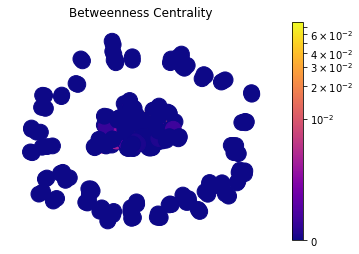

Centralities in descending order by value
David Guetta :  0.07657473761188938
J Balvin :  0.06953189097114873
Bebe Rexha :  0.06544017697225891
Major Lazer :  0.06491226898625103
Camila Cabello :  0.0603324024685393
Future :  0.059155379756213745
Daddy Yankee :  0.05493914645503251
Justin Bieber :  0.051743817735189726
French Montana :  0.04920889652053614
Nicki Minaj :  0.04333985331682205
Young Thug :  0.04265804802158351
Drake :  0.038220945541152275
Ty Dolla $ign :  0.03709664871415586
The Weeknd :  0.03678451362121748
Travis Scott :  0.036681981828003835
Logic :  0.03336980267127327
Eminem :  0.03255791289791145
Cheat Codes :  0.030649357855240204
Maluma :  0.030364405939484907
Martin Garrix :  0.029968243457548255
The Chainsmokers :  0.028979123749388304
Big Sean :  0.02892961408719632
Machine Gun Kelly :  0.02854523101723795
Ed Sheeran :  0.027588271553363967
Gucci Mane :  0.02671709038569108
Lil Wayne :  0.024638983404908235
Anitta :  0.023433943439846384
A$AP Rocky :  0.022464

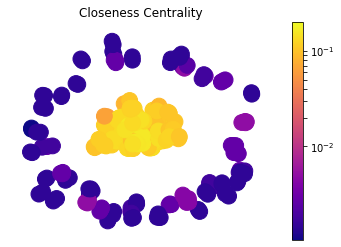

Centralities in descending order by value
Major Lazer :  0.1979494816427058
Camila Cabello :  0.19679972666704632
Nicki Minaj :  0.19660939811127548
Young Thug :  0.19604061489591015
Travis Scott :  0.19547511312217197
Future :  0.18964003511852504
Drake :  0.1870231073110017
Ty Dolla $ign :  0.18347844552983647
Bebe Rexha :  0.1824902312810223
Ed Sheeran :  0.18200010532413505
J Balvin :  0.18167481469799718
Lil Wayne :  0.1815126050420168
Ariana Grande :  0.18135068478774205
Justin Bieber :  0.18118905316137154
X Ambassadors :  0.18006564893450738
PARTYNEXTDOOR :  0.1792717086834734
Calvin Harris :  0.17911376004146154
Machine Gun Kelly :  0.17879869625950648
Quavo :  0.178328173374613
Offset :  0.17817188224983244
Chris Brown :  0.1778601204261232
Lil Uzi Vert :  0.17770464829288363
The Weeknd :  0.17754944772668896
Wiz Khalifa :  0.17677749360613812
21 Savage :  0.1760122230710466
Jason Derulo :  0.1757079668513905
Migos :  0.17540476069634067
Pharrell Williams :  0.174651303820497

In [ ]:
graph_artist = read_artist_dataset("Datasets/Artist Collaboration Network/global/global-artist_network-2017.csv")

pos = nx.spring_layout(graph_artist, seed = 600)
nodes = nx.draw_networkx_nodes(graph_artist, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_artist, pos)
print(graph_artist)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph_artist)
draw(graph_artist, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph_artist, weight="weight")
draw(graph_artist, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_artist, distance = "weight")
draw(graph_artist, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Global 2018



Graph with 482 nodes and 927 edges




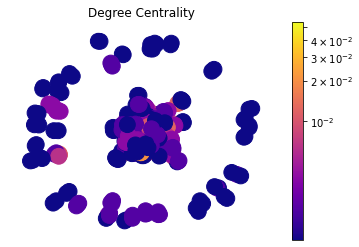

Centralities in descending order by value
Ozuna :  0.05405405405405406
Bad Bunny :  0.05197505197505198
J Balvin :  0.0498960498960499
Nicki Minaj :  0.04573804573804574
Cardi B :  0.04158004158004158
Logic :  0.04158004158004158
Travis Scott :  0.0395010395010395
Swae Lee :  0.035343035343035345
Drake :  0.035343035343035345
Anuel AA :  0.035343035343035345
David Guetta :  0.035343035343035345
Lil Wayne :  0.035343035343035345
Quavo :  0.033264033264033266
XXXTENTACION :  0.031185031185031187
Future :  0.029106029106029108
6ix9ine :  0.029106029106029108
Ty Dolla $ign :  0.029106029106029108
Nicky Jam :  0.02702702702702703
Khalid :  0.02702702702702703
Calvin Harris :  0.02702702702702703
21 Savage :  0.02494802494802495
Migos :  0.02494802494802495
Daddy Yankee :  0.02494802494802495
A$AP Rocky :  0.02494802494802495
DJ Luian :  0.02286902286902287
Mambo Kingz :  0.02286902286902287
Diplo :  0.02286902286902287
Post Malone :  0.02286902286902287
Justin Bieber :  0.02286902286902287


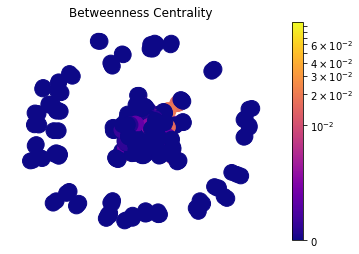

Centralities in descending order by value
J Balvin :  0.09813731139348462
Cardi B :  0.0749877416273662
Quavo :  0.0626837652570817
Nicki Minaj :  0.0610354670904826
Khalid :  0.057577849502113525
Ty Dolla $ign :  0.05566951823289086
David Guetta :  0.05022334424464341
Logic :  0.050077237787347295
Drake :  0.04813625668011303
Lil Wayne :  0.047923025235578946
Bad Bunny :  0.04765096258931595
Maluma :  0.0445253395821991
Travis Scott :  0.042645846440051184
Swae Lee :  0.039863780463689845
Bebe Rexha :  0.03979689406987459
Ozuna :  0.037801476113104145
XXXTENTACION :  0.036421147348057015
Future :  0.032935421435957304
Liam Payne :  0.030127028721978616
Juan Magán :  0.02873863690322964
Anne-Marie :  0.028712968669840865
G-Eazy :  0.028447880050679778
Kendrick Lamar :  0.028324288681074963
Manuel Turizo :  0.026091642108327616
Anuel AA :  0.02589667574603328
Kanye West :  0.02560995950549303
Sfera Ebbasta :  0.025216562716562713
French Montana :  0.024736292787274367
A$AP Rocky :  0.02

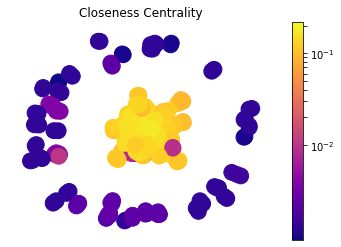

Centralities in descending order by value
J Balvin :  0.2167526815306295
Ty Dolla $ign :  0.21609084128168096
Cardi B :  0.2147792125030365
Nicki Minaj :  0.21396749968178538
Drake :  0.2090686869121138
Quavo :  0.20768818934629646
David Guetta :  0.20753592527786074
Maluma :  0.20632580326457875
Lil Wayne :  0.2055766173413232
French Montana :  0.20483285244500876
Swae Lee :  0.2043891711761748
Travis Scott :  0.2032153640193841
XXXTENTACION :  0.2032153640193841
Migos :  0.2013364168413955
Khalid :  0.20048087965934988
DJ Snake :  0.200055831857952
Meek Mill :  0.19879143404424302
Lil Pump :  0.19879143404424302
Bad Bunny :  0.19563165312992545
Post Malone :  0.19509235153618337
Charli XCX :  0.19495799041253586
Justin Bieber :  0.19482381423193534
Bebe Rexha :  0.19482381423193534
21 Savage :  0.19455601517457186
Ozuna :  0.19375701716564142
Anuel AA :  0.19375701716564142
Jason Derulo :  0.19362448842613003
Kanye West :  0.19322798776723693
Liam Payne :  0.1924398382590089
Big Sean

In [ ]:
graph_artist = read_artist_dataset("Datasets/Artist Collaboration Network/global/global-artist_network-2018.csv")

pos = nx.spring_layout(graph_artist, seed = 600)
nodes = nx.draw_networkx_nodes(graph_artist, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_artist, pos)
print(graph_artist)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph_artist)
draw(graph_artist, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph_artist, weight="weight")
draw(graph_artist, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_artist, distance = "weight")
draw(graph_artist, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Global 2019



Graph with 527 nodes and 1067 edges




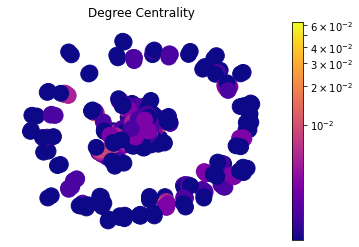

Centralities in descending order by value
J Balvin :  0.06273764258555133
Nicky Jam :  0.051330798479087454
Farruko :  0.051330798479087454
Anuel AA :  0.043726235741444866
Ed Sheeran :  0.043726235741444866
Sech :  0.04182509505703422
Ozuna :  0.04182509505703422
Post Malone :  0.04182509505703422
Daddy Yankee :  0.03802281368821293
Dalex :  0.034220532319391636
Lenny Tavárez :  0.034220532319391636
Travis Scott :  0.034220532319391636
Cardi B :  0.034220532319391636
Justin Quiles :  0.03231939163498099
Becky G :  0.03231939163498099
Anitta :  0.03231939163498099
Tyga :  0.030418250950570342
Bad Bunny :  0.028517110266159697
Darell :  0.028517110266159697
Diplo :  0.028517110266159697
Lil Baby :  0.028517110266159697
Khalid :  0.028517110266159697
Natti Natasha :  0.028517110266159697
Dreamville :  0.026615969581749048
Zion :  0.026615969581749048
Dímelo Flow :  0.026615969581749048
Rafa Pabön :  0.024714828897338403
DaBaby :  0.024714828897338403
Lunay :  0.024714828897338403
A Boogi

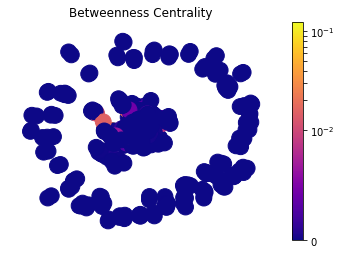

Centralities in descending order by value
J Balvin :  0.12351204549812299
Cardi B :  0.07536423598361569
Khalid :  0.05449910282227925
Ed Sheeran :  0.04866219521976986
Anitta :  0.046742473873335466
Diplo :  0.04618594876957572
Farruko :  0.03739195133763731
Nicki Minaj :  0.0355318634680943
Post Malone :  0.03499461562782575
Nicky Jam :  0.030605572631017902
Kygo :  0.029682122150889112
Marshmello :  0.02863024775657843
The Chainsmokers :  0.028518417547206243
A Boogie Wit da Hoodie :  0.028127603592898433
Juice WRLD :  0.027794305763946314
Ty Dolla $ign :  0.027694257819985475
Bad Bunny :  0.027594013306285425
Becky G :  0.026135620182856336
Anuel AA :  0.025501715380185353
Rita Ora :  0.02258798291461237
Halsey :  0.021812917035745092
Drake :  0.021455254646198522
benny blanco :  0.02112216356653023
Daddy Yankee :  0.020911601564610617
DJ Khaled :  0.02000724270414007
Chris Brown :  0.019863352117340572
David Guetta :  0.019726063638725005
Kanye West :  0.019455855380221734
DaBaby 

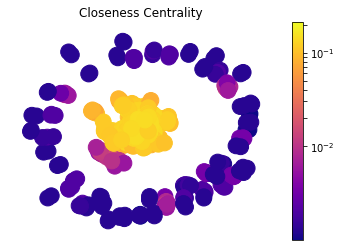

Centralities in descending order by value
J Balvin :  0.2111292482430332
Cardi B :  0.200805079624792
Tainy :  0.18982113459138655
Diplo :  0.18779560419178337
Farruko :  0.18623418949328782
benny blanco :  0.18567282042171798
Post Malone :  0.18483708379566374
Bad Bunny :  0.18456017430683128
Anitta :  0.18442203046378725
Chris Brown :  0.1831879797023195
Khalid :  0.18305188164904884
Ed Sheeran :  0.1819703343424075
KAROL G :  0.1798451333573867
DJ Khaled :  0.17841262324375073
Nicky Jam :  0.17764083107398684
Nicki Minaj :  0.17764083107398684
Selena Gomez :  0.17725743359684876
Offset :  0.1753650054801564
Anuel AA :  0.17486716302315103
DJ Snake :  0.17486716302315103
A Boogie Wit da Hoodie :  0.17486716302315103
21 Savage :  0.17339045228685415
Maluma :  0.17266141044121916
Major Lazer :  0.17254049908936958
Ozuna :  0.1714598696587472
Camila Cabello :  0.1714598696587472
Halsey :  0.17134063470070915
Drake :  0.17003991214604539
Ty Dolla $ign :  0.17003991214604539
Rvssian :  0.

In [ ]:
graph_artist = read_artist_dataset("Datasets/Artist Collaboration Network/global/global-artist_network-2019.csv")

pos = nx.spring_layout(graph_artist, seed = 600)
nodes = nx.draw_networkx_nodes(graph_artist, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_artist, pos)
print(graph_artist)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph_artist)
draw(graph_artist, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph_artist, weight="weight")
draw(graph_artist, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_artist, distance = "weight")
draw(graph_artist, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])

# Genre Collaboration Network
---
1.   Australia
2.   Brazil
3.   Canada
4.   Germany
5.   France
6.   United Kingdom
7.   Japan
8.   United States of America
9.   Global (17/18/19)




> Australia



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

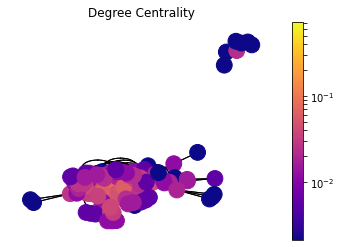

Centralities in descending order by value
pop :  0.7176470588235294
dance pop :  0.5843137254901961
pop rap :  0.5411764705882353
post-teen pop :  0.5254901960784314
rap :  0.4784313725490196
trap :  0.3803921568627451
tropical house :  0.3764705882352941
edm :  0.3764705882352941
hip hop :  0.3529411764705882
melodic rap :  0.2980392156862745
electropop :  0.29411764705882354
uk pop :  0.28627450980392155
canadian pop :  0.2588235294117647
southern hip hop :  0.2392156862745098
electro house :  0.2392156862745098
alternative r&b :  0.22352941176470587
atl hip hop :  0.21568627450980393
r&b :  0.21568627450980393
dfw rap :  0.1843137254901961
big room :  0.1843137254901961
trap soul :  0.1803921568627451
canadian hip hop :  0.1803921568627451
toronto rap :  0.17254901960784313
latin :  0.16078431372549018
house :  0.1568627450980392
gangster rap :  0.14509803921568626
chicago rap :  0.1411764705882353
brostep :  0.1411764705882353
queens hip hop :  0.13725490196078433
uk dance :  0.133

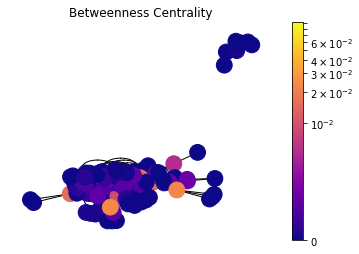

Centralities in descending order by value
dance pop :  0.09206955747801399
pop :  0.09122939231722069
canadian pop :  0.07600746110534466
post-teen pop :  0.07586049885631602
rock :  0.05745223972910618
hip hop :  0.05097957530544827
pop rap :  0.049612267829816384
alternative r&b :  0.043804894904316584
tropical house :  0.041486708257564675
electropop :  0.04025325884037259
edm :  0.04006897590471686
australian indie :  0.037600795104512114
trap :  0.029624603943448097
chicago rap :  0.028647785453031732
melodic rap :  0.028647295972461097
house :  0.02787396177407555
uk pop :  0.024944390868601413
australian pop :  0.024929579484281192
experimental pop :  0.023722089395009437
muzica crestina :  0.0227955462786403
uk hip hop :  0.020955534609356462
dfw rap :  0.019822026189561352
metropopolis :  0.0195733654619241
electro house :  0.01910141840289495
canadian contemporary r&b :  0.018351545249361296
gangster rap :  0.018104232793816052
progressive electro house :  0.01797440916987433

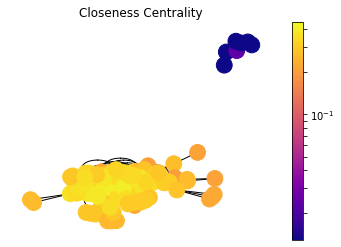

Centralities in descending order by value
dance pop :  0.44831255922443325
post-teen pop :  0.4433679354094579
pop :  0.4345804628157569
hip hop :  0.42613455276103374
tropical house :  0.42314413484692126
canadian pop :  0.42314413484692126
progressive electro house :  0.42092872052835095
canadian hip hop :  0.41946462063086104
alternative r&b :  0.4172874686206663
canadian contemporary r&b :  0.4172874686206663
rock :  0.4144195135098713
edm :  0.4130002686005909
gangster rap :  0.4115907113698722
electropop :  0.4101907429638522
latin hip hop :  0.4094943240454076
canadian electronic :  0.4094943240454076
deep big room :  0.4094943240454076
metropopolis :  0.4074191838897721
house :  0.40673213636213335
uk hip hop :  0.40673213636213335
dmv rap :  0.40673213636213335
dutch edm :  0.40673213636213335
trance :  0.40673213636213335
afro dancehall :  0.40604740212583346
nigerian hip hop :  0.40604740212583346
nigerian pop :  0.40604740212583346
azonto :  0.40604740212583346
brostep :  0

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/au/au-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Brazil



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

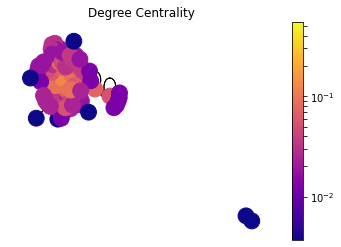

Centralities in descending order by value
funk carioca :  0.5460122699386504
baile pop :  0.5337423312883436
pop :  0.5337423312883436
dance pop :  0.43558282208588955
post-teen pop :  0.4171779141104295
funk das antigas :  0.4171779141104295
pagode baiano :  0.4171779141104295
pop rap :  0.37423312883435583
pop nacional :  0.36809815950920244
rap :  0.3006134969325153
edm :  0.3006134969325153
latin :  0.26993865030674846
brazilian edm :  0.24539877300613497
reggaeton :  0.24539877300613497
electro house :  0.24539877300613497
funk ostentacao :  0.23312883435582823
tropical house :  0.2147239263803681
afrofuturismo brasileiro :  0.1901840490797546
electronic trap :  0.1901840490797546
uk pop :  0.18404907975460122
r&b :  0.18404907975460122
brazilian hip hop :  0.17791411042944785
electropop :  0.17791411042944785
trap :  0.17177914110429449
melodic rap :  0.17177914110429449
r&b brasileiro :  0.16564417177914112
sertanejo universitario :  0.15337423312883436
hip hop :  0.153374233128

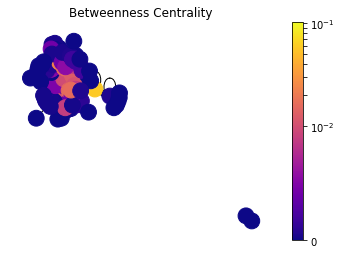

Centralities in descending order by value
post-teen pop :  0.10219558872627484
pop rap :  0.09439740128753471
dfw rap :  0.0831132875428906
funk carioca :  0.08039093046688273
electropop :  0.07311372228860878
baile pop :  0.0635224632672228
pop nacional :  0.059586371161115696
rock :  0.0588881314852685
pop :  0.05398744983363211
funk das antigas :  0.05135463454640653
melodic rap :  0.04901853259967753
tropical house :  0.04885477778902377
dance pop :  0.04329598224981837
latin :  0.04111015239608333
pagode baiano :  0.04063462289602517
brazilian hip hop :  0.04014870431648249
electro house :  0.038391687297365765
sertanejo universitario :  0.031760862654729376
brostep :  0.031248687323789135
afrofuturismo brasileiro :  0.02942995520488233
edm :  0.029398894695185727
r&b brasileiro :  0.028146209776359555
r&b :  0.026849799386763958
brazilian edm :  0.025397966883132908
funk ostentacao :  0.024204939396473786
k-pop boy group :  0.02378364923555891
progressive electro house :  0.02162

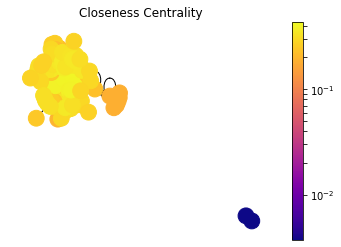

Centralities in descending order by value
electropop :  0.43096081267561137
post-teen pop :  0.42979605372243407
r&b :  0.4130507529280535
moombahton :  0.41198067325725546
urban contemporary :  0.41198067325725546
hip pop :  0.41091612371395503
tropical house :  0.4098570615394346
afrofuturismo brasileiro :  0.4077552304546169
funk carioca :  0.4067123782028148
mexican pop :  0.40361558344492543
baile pop :  0.4025937718412674
funk ostentacao :  0.4005655916304801
pop rap :  0.4005655916304801
southern hip hop :  0.4005655916304801
funk das antigas :  0.39955914542035326
pagode baiano :  0.39955914542035326
pop :  0.39855774405338495
dancehall :  0.39855774405338495
complextro :  0.39656992488104886
dance pop :  0.39460183592382286
bass trap :  0.39362509870618967
brostep :  0.39362509870618967
electro :  0.39362509870618967
trap latino :  0.3926531848822237
pop nacional :  0.39168605881108526
r&b brasileiro :  0.39168605881108526
electronic trap :  0.38976602911103087
pop reggaeton :

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/br/br-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Canada



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

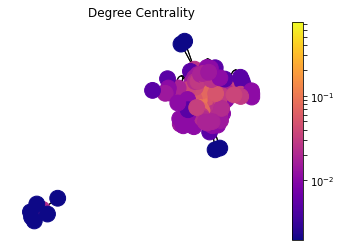

Centralities in descending order by value
pop :  0.7380073800738007
dance pop :  0.6236162361623616
pop rap :  0.6014760147601476
rap :  0.5571955719557196
post-teen pop :  0.49815498154981547
trap :  0.46494464944649444
hip hop :  0.44649446494464945
edm :  0.4022140221402214
tropical house :  0.3985239852398524
melodic rap :  0.33948339483394835
southern hip hop :  0.3210332103321033
canadian pop :  0.28044280442804426
electropop :  0.2656826568265683
atl hip hop :  0.26199261992619927
electro house :  0.26199261992619927
uk pop :  0.25461254612546125
alternative r&b :  0.25092250922509224
r&b :  0.24354243542435425
chicago rap :  0.23616236162361623
big room :  0.23616236162361623
latin :  0.23247232472324722
canadian hip hop :  0.2287822878228782
toronto rap :  0.2177121771217712
urban contemporary :  0.2103321033210332
underground hip hop :  0.2029520295202952
miami hip hop :  0.2029520295202952
reggaeton :  0.2029520295202952
conscious hip hop :  0.1992619926199262
progressive el

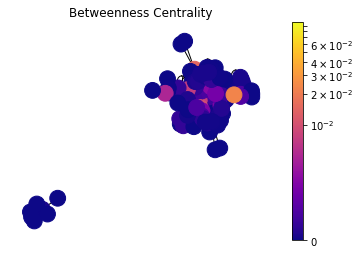

Centralities in descending order by value
pop :  0.09731267584547795
canadian pop :  0.0914143232061982
post-teen pop :  0.06653975225732905
dance pop :  0.06635714650879568
rock :  0.053451018791305635
hip hop :  0.04711452255237627
pop rap :  0.045812407659980105
edm :  0.043278161515925194
alternative r&b :  0.042571434344967705
tropical house :  0.04098842663740232
trap :  0.03163194668141368
uk pop :  0.028946218009859855
progressive electro house :  0.02637682984918003
adult standards :  0.02488057323868681
melodic rap :  0.024835997205836013
experimental pop :  0.022811821188529303
southern hip hop :  0.02096239768388545
dfw rap :  0.018771311444823188
chicago rap :  0.01876767901713615
hip pop :  0.017706918259439233
brostep :  0.017400312267633493
big room :  0.017172646548212007
electro house :  0.01591312433136678
rap :  0.015161714791586053
r&b :  0.014994547966842978
atl hip hop :  0.014855393959388362
finnish pop :  0.014486577857330474
soundtrack :  0.014350143501435014


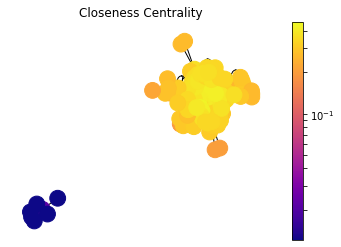

Centralities in descending order by value
pop :  0.4633888501047173
post-teen pop :  0.44494950139812817
dance pop :  0.44341519277261743
tropical house :  0.44341519277261743
panamanian pop :  0.44265199966973856
hip hop :  0.4418914292235706
edm :  0.43887510547460423
canadian pop :  0.43589968103070864
progressive electro house :  0.43516211811864314
deep pop r&b :  0.4329643296432964
alternative r&b :  0.43151142920825186
rock :  0.43078862949433516
canadian electronic :  0.43078862949433516
soca :  0.42935027013041416
uk funky :  0.42935027013041416
neo soul :  0.42792148387374057
brostep :  0.42439077856125096
pop rock :  0.42439077856125096
dutch edm :  0.42439077856125096
trance :  0.42439077856125096
uk pop :  0.42299475626335215
indie pop rap :  0.42230018359296895
afro dancehall :  0.42230018359296895
nigerian hip hop :  0.42230018359296895
nigerian pop :  0.42230018359296895
azonto :  0.42160788821002965
pop rap :  0.42091785893309014
trap :  0.42091785893309014
rap latina 

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/ca/ca-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Germany



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

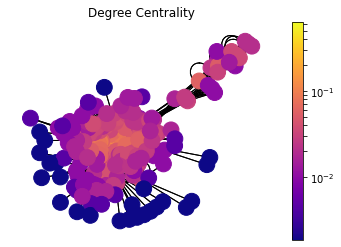

Centralities in descending order by value
pop :  0.625
dance pop :  0.4861111111111111
pop rap :  0.4236111111111111
tropical house :  0.3993055555555555
post-teen pop :  0.3784722222222222
edm :  0.3680555555555555
rap :  0.3506944444444444
trap :  0.28125
uk pop :  0.2743055555555555
german hip hop :  0.2673611111111111
electro house :  0.22916666666666666
hip hop :  0.2222222222222222
electropop :  0.21527777777777776
melodic rap :  0.20833333333333331
reggaeton :  0.1909722222222222
big room :  0.1909722222222222
southern hip hop :  0.17708333333333331
latin :  0.17708333333333331
progressive electro house :  0.16666666666666666
dfw rap :  0.1597222222222222
german pop :  0.1423611111111111
latin hip hop :  0.1423611111111111
brostep :  0.13541666666666666
house :  0.12152777777777778
pop edm :  0.11805555555555555
tropical :  0.11805555555555555
deep german hip hop :  0.11458333333333333
canadian hip hop :  0.11458333333333333
toronto rap :  0.11458333333333333
german cloud rap : 

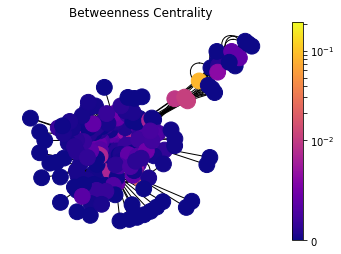

Centralities in descending order by value
pop :  0.2060502659356974
german hip hop :  0.10044706473008286
adult standards :  0.08588362189637434
pop rap :  0.0850107258848798
german pop :  0.07814710513329269
dance pop :  0.07554240122537521
tropical house :  0.0587803803393943
electropop :  0.05478480285441523
edm :  0.04949407303283055
post-teen pop :  0.04734179839975029
uk pop :  0.04606588206131827
europop :  0.04551211633139384
rock :  0.0445072575449846
electro house :  0.03424698382934936
deep german hip hop :  0.03388520512416716
melodic rap :  0.03221949258247352
progressive electro house :  0.02632141490669947
albanian hip hop :  0.02630806649868416
german cloud rap :  0.026146589636985587
hip hop :  0.025041133395216644
latin hip hop :  0.024745941741223465
trap :  0.024230349589202692
partyschlager :  0.022746553321328997
rap :  0.01901612058908962
southern hip hop :  0.01625114104409324
dfw rap :  0.01602109637371323
emo rap :  0.015877023975875787
gangster rap :  0.01487

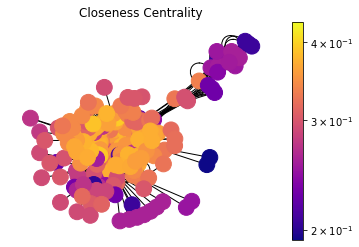

Centralities in descending order by value
pop :  0.4298507462686567
pop rap :  0.4131994261119082
tropical house :  0.41260744985673353
german hip hop :  0.41025641025641024
dance pop :  0.4096728307254623
electropop :  0.40620592383638926
edm :  0.4011142061281337
electro house :  0.3988919667590028
bmore :  0.3988919667590028
ninja :  0.3988919667590028
rap rock :  0.39398084815321477
progressive electro house :  0.39344262295081966
rock :  0.39290586630286495
emo rap :  0.39183673469387753
dutch hip hop :  0.39183673469387753
dutch urban :  0.39183673469387753
melodic rap :  0.3902439024390244
post-teen pop :  0.3876177658142665
mexican pop :  0.3876177658142665
uk hip hop :  0.3865771812080537
trap :  0.3850267379679144
latin hip hop :  0.3850267379679144
uk pop :  0.3829787234042553
contemporary country :  0.3829787234042553
pop rock :  0.380449141347424
belgian dance :  0.380449141347424
chicago rap :  0.3794466403162055
indie poptimism :  0.37894736842105264
miami hip hop :  0.3

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/de/de-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> France



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

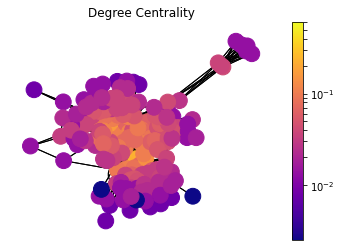

Centralities in descending order by value
pop :  0.6009174311926606
dance pop :  0.46788990825688076
tropical house :  0.4174311926605505
french hip hop :  0.3944954128440367
pop rap :  0.3944954128440367
edm :  0.3853211009174312
post-teen pop :  0.3807339449541285
pop urbaine :  0.3669724770642202
rap :  0.2981651376146789
electropop :  0.24770642201834864
francoton :  0.23394495412844038
trap :  0.23394495412844038
latin :  0.22935779816513763
reggaeton :  0.22935779816513763
rap conscient :  0.22477064220183487
electro house :  0.21559633027522937
hip hop :  0.1926605504587156
big room :  0.1743119266055046
uk pop :  0.16972477064220184
progressive electro house :  0.1651376146788991
tropical :  0.1559633027522936
southern hip hop :  0.15137614678899083
rap francais :  0.14678899082568808
rap algerien :  0.14220183486238533
trap latino :  0.13761467889908258
uk dance :  0.13302752293577982
basshall :  0.13302752293577982
melodic rap :  0.12844036697247707
canadian pop :  0.12844036

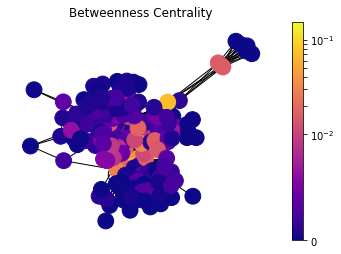

Centralities in descending order by value
pop :  0.1524779991518889
french hip hop :  0.1038091873488047
pop urbaine :  0.09562352370486674
tropical house :  0.08984605208006573
pop rap :  0.07946138695426828
rock :  0.0734265603642819
post-teen pop :  0.07336016181662955
edm :  0.07218387701094423
dance pop :  0.06704570173070458
rap conscient :  0.0635406956275738
electropop :  0.04945397978447117
francoton :  0.040139169248225914
dfw rap :  0.03322517059148721
emo rap :  0.032472085167239276
new french touch :  0.03015916197217577
latin hip hop :  0.023003575339245633
hip pop :  0.018913166779238964
southern hip hop :  0.018569936581753446
variete francaise :  0.018264067982919713
rap algerien :  0.01810444094193761
dutch hip hop :  0.01775264524928258
electro house :  0.01710748699592938
belgian hip hop :  0.017013467719020802
g funk :  0.016923232988391403
canadian pop :  0.016414411854190483
experimental rock :  0.016299094915086822
experimental :  0.016293810173193615
experiment

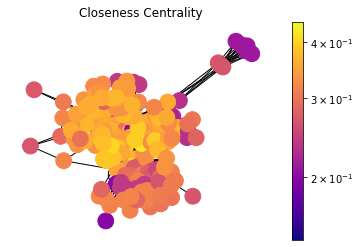

Centralities in descending order by value
pop :  0.4421906693711968
tropical house :  0.42412451361867703
emo rap :  0.42330097087378643
french hip hop :  0.42084942084942084
pop urbaine :  0.4168260038240918
edm :  0.41603053435114506
dance pop :  0.4090056285178236
southern hip hop :  0.4074766355140187
neo soul :  0.4044526901669759
rap conscient :  0.40370370370370373
pop rap :  0.4
post-teen pop :  0.39853747714808047
latin hip hop :  0.3978102189781022
bmore :  0.39636363636363636
ninja :  0.39636363636363636
alternative r&b :  0.39421338155515373
g funk :  0.39421338155515373
electropop :  0.3935018050541516
queens hip hop :  0.3935018050541516
hip pop :  0.3927927927927928
deep pop r&b :  0.38652482269503546
indie r&b :  0.38652482269503546
basshall :  0.38380281690140844
rap latina :  0.38312829525483305
shimmer pop :  0.38178633975481613
gangster rap :  0.3811188811188811
dutch hip hop :  0.3811188811188811
belgian dance :  0.3797909407665505
dutch urban :  0.3784722222222222

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/fr/fr-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> United kingdom



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

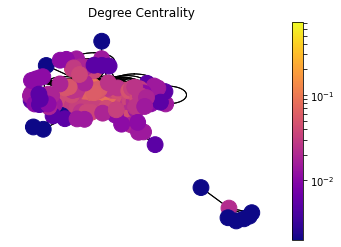

Centralities in descending order by value
pop :  0.7137546468401487
dance pop :  0.6022304832713754
post-teen pop :  0.5427509293680297
pop rap :  0.5315985130111524
rap :  0.45724907063197023
tropical house :  0.42007434944237915
trap :  0.37174721189591076
edm :  0.34572490706319703
uk pop :  0.3271375464684015
hip hop :  0.3159851301115241
melodic rap :  0.3048327137546468
house :  0.2527881040892193
electropop :  0.2453531598513011
uk hip hop :  0.241635687732342
southern hip hop :  0.241635687732342
r&b :  0.21933085501858735
grime :  0.20446096654275092
electro house :  0.20446096654275092
canadian pop :  0.1970260223048327
canadian hip hop :  0.1970260223048327
uk dance :  0.1933085501858736
latin :  0.1933085501858736
toronto rap :  0.1933085501858736
alternative r&b :  0.1895910780669145
atl hip hop :  0.17843866171003717
dfw rap :  0.17472118959107805
uk drill :  0.1524163568773234
urban contemporary :  0.1524163568773234
big room :  0.1524163568773234
metropopolis :  0.15241

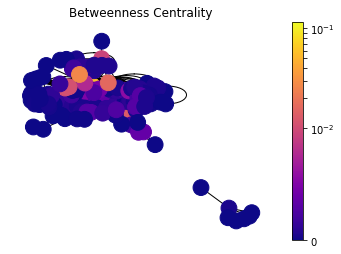

Centralities in descending order by value
dance pop :  0.11461276104104269
pop :  0.10036626780178849
post-teen pop :  0.08963462017378265
tropical house :  0.05877325243398983
rock :  0.05612236723274099
pop rap :  0.04477315716081877
house :  0.044632511246942466
edm :  0.040306652649198936
canadian pop :  0.03836615469958333
uk pop :  0.03597107967792543
alternative r&b :  0.03397796684647672
melodic rap :  0.03195461837442236
experimental pop :  0.026733380630679312
hip hop :  0.025076550582259508
metropopolis :  0.023690472334223646
adult standards :  0.021864310396459554
progressive electro house :  0.019445945216855415
london rap :  0.018812134219190788
trap :  0.018709962247364327
latin :  0.018506359889956393
electropop :  0.017664309331583212
dfw rap :  0.0173147955917205
chicago rap :  0.01712202155319981
electro house :  0.01679429212109861
brostep :  0.01662770288657546
piano rock :  0.01658878148792428
uk drill :  0.01638089064725951
soundtrack :  0.014453753537146978
r&b

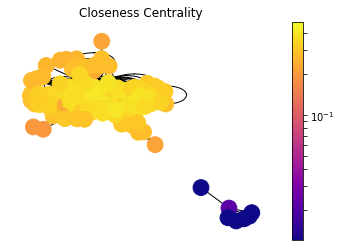

Centralities in descending order by value
dance pop :  0.47786920624312546
post-teen pop :  0.4516498338651841
pop :  0.45085186596082866
tropical house :  0.44379505414578957
melodic rap :  0.42959958945089055
afro dancehall :  0.4274407975441022
progressive electro house :  0.42672601360172074
canadian hip hop :  0.42530359355638164
social media pop :  0.42389062480702494
indie poptimism :  0.42389062480702494
edm :  0.4217886878245108
house :  0.41901831877476026
east coast hip hop :  0.41833140349808035
latin :  0.41628410462288584
metropopolis :  0.4156061174818062
hip hop :  0.4149303351769577
brostep :  0.4135853421942123
canadian contemporary r&b :  0.4129161102489143
canadian electronic :  0.4129161102489143
grime :  0.4122490406039241
mexican pop :  0.4102607011797894
nigerian hip hop :  0.4096021767798218
nigerian pop :  0.4096021767798218
uk alternative pop :  0.40894576303498237
azonto :  0.40894576303498237
deep big room :  0.40894576303498237
texas country :  0.407639227

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/gb/gb-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Japan



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

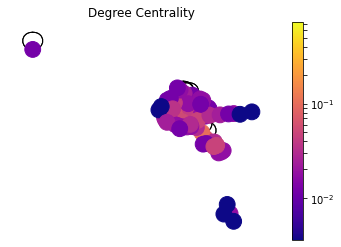

Centralities in descending order by value
pop :  0.7305389221556887
dance pop :  0.5808383233532934
post-teen pop :  0.5568862275449102
pop rap :  0.437125748502994
tropical house :  0.40119760479041916
edm :  0.37724550898203596
electropop :  0.30538922155688625
uk pop :  0.28742514970059885
rap :  0.281437125748503
trap :  0.23952095808383234
electro house :  0.23353293413173654
hip hop :  0.2095808383233533
j-pop :  0.19760479041916168
canadian pop :  0.18562874251497008
big room :  0.18562874251497008
r&b :  0.17964071856287425
k-pop :  0.16167664670658682
progressive electro house :  0.16167664670658682
latin :  0.14371257485029942
reggaeton :  0.14371257485029942
melodic rap :  0.14371257485029942
brostep :  0.14371257485029942
southern hip hop :  0.1377245508982036
indie poptimism :  0.1377245508982036
uk dance :  0.1317365269461078
urban contemporary :  0.11976047904191617
progressive house :  0.11976047904191617
conscious hip hop :  0.11377245508982037
viral pop :  0.107784431

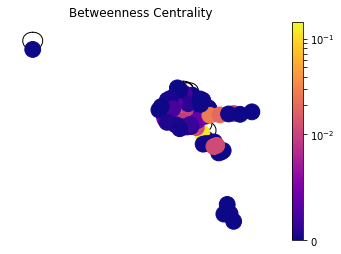

Centralities in descending order by value
post-teen pop :  0.14862316880409548
rock :  0.12246257028563284
dance pop :  0.11377223189662937
pop :  0.10254885774965761
k-pop :  0.08658167106267568
tropical house :  0.06591458423030555
j-pop :  0.06511584425600679
pop rap :  0.064001688801155
uk pop :  0.06108342232966214
big room :  0.05435601294483264
edm :  0.034819287022385674
indie poptimism :  0.03169131286533589
electropop :  0.031591996636721825
electro house :  0.03089286604915603
hollywood :  0.02673160591104797
progressive electro house :  0.026249593722195125
viral pop :  0.023539774989455
gangster rap :  0.02117693826835202
show tunes :  0.019815685751186307
j-rock :  0.017341108592728256
k-pop boy group :  0.015720831723215308
indietronica :  0.013853662490204966
country :  0.013281912559910274
country road :  0.013238376116170139
hip hop :  0.013139531531178443
j-rap :  0.01282134417640107
atl trap :  0.01277234997947471
nc hip hop :  0.01275207070798846
j-division :  0.01

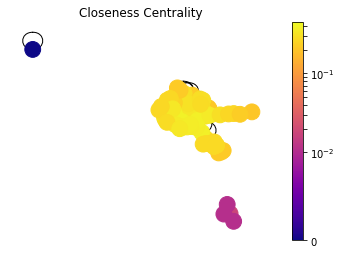

Centralities in descending order by value
dance pop :  0.44518328781530425
post-teen pop :  0.43531773019058834
tropical house :  0.4213128702380761
indie poptimism :  0.41795133137979357
pop :  0.41031253420052843
big room :  0.41031253420052843
j-pop :  0.4092440119760479
indietronica :  0.40398380616658713
bmore :  0.4029479502533395
ninja :  0.4029479502533395
progressive electro house :  0.4019173928358118
nc hip hop :  0.39784734328810734
edm :  0.3968426782798041
texas country :  0.3968426782798041
atl trap :  0.39584307455617734
gangster rap :  0.392874251497006
j-rock :  0.392874251497006
etherpop :  0.3918945152089835
j-division :  0.3909196532308517
j-pop boy group :  0.3909196532308517
rock :  0.3909196532308517
electropop :  0.38898440742277823
pop rock :  0.38898440742277823
modern alternative rock :  0.3880239520958084
uk pop :  0.387068228075868
country road :  0.38422909681858775
country :  0.38422909681858775
neo soul :  0.38422909681858775
viral pop :  0.383291952680

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/jp/jp-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> United States of America



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

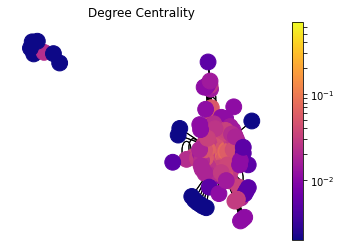

Centralities in descending order by value
pop :  0.6853932584269663
pop rap :  0.651685393258427
rap :  0.5842696629213483
dance pop :  0.5393258426966292
hip hop :  0.46441947565543074
post-teen pop :  0.45692883895131087
trap :  0.44569288389513106
melodic rap :  0.35580524344569286
tropical house :  0.34831460674157305
edm :  0.3408239700374532
southern hip hop :  0.31086142322097376
chicago rap :  0.3071161048689139
r&b :  0.30337078651685395
conscious hip hop :  0.2883895131086142
electropop :  0.27715355805243447
atl hip hop :  0.2621722846441948
latin :  0.24344569288389514
alternative r&b :  0.23595505617977527
urban contemporary :  0.23595505617977527
gangster rap :  0.2247191011235955
uk pop :  0.2247191011235955
reggaeton :  0.21348314606741572
electro house :  0.21348314606741572
underground hip hop :  0.20224719101123595
trap latino :  0.20224719101123595
trap soul :  0.19850187265917604
miami hip hop :  0.19850187265917604
canadian hip hop :  0.18352059925093633
dfw rap :

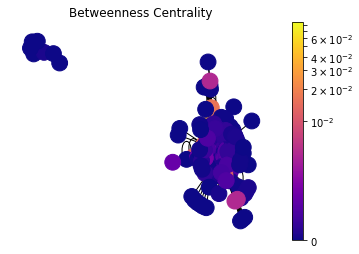

Centralities in descending order by value
post-teen pop :  0.08405047396765229
pop rap :  0.08164593420724582
pop :  0.07743916623681134
rock :  0.07542381451383437
dance pop :  0.06947258748270983
escape room :  0.049421602619791456
hip hop :  0.04269619330691378
tropical house :  0.04257715558387671
adult standards :  0.03816462574318294
trap latino :  0.03714310489149731
edm :  0.034337244978828355
uk pop :  0.03144264619383482
trap :  0.031018705342694256
brostep :  0.028603050885178345
chicago rap :  0.025667935586879603
conscious hip hop :  0.024877535331770145
melodic rap :  0.02468446224515794
r&b :  0.021307583664658188
progressive electro house :  0.02090027408203073
rap :  0.02052056966599271
hip pop :  0.019897420455195346
canadian pop :  0.01810329913144934
electropop :  0.017388809874747585
gangster rap :  0.017211707249339552
lounge :  0.016289926185640534
atl hip hop :  0.015897329231564655
dmv rap :  0.014791846642518664
soundtrack :  0.014558869082819408
dfw rap :  0.

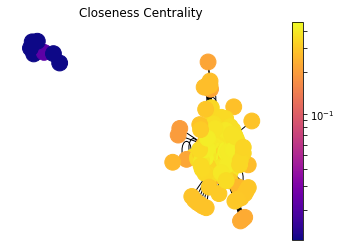

Centralities in descending order by value
post-teen pop :  0.4594982225031778
dance pop :  0.4553660442432571
tropical house :  0.44262853251617296
progressive electro house :  0.44108627282099466
brostep :  0.43955472326258843
dmv rap :  0.4380337726630639
pop :  0.43652331137801886
pop rap :  0.43577198037736825
indie poptimism :  0.4342770507705848
trap latino :  0.4335334256836489
hip hop :  0.43131775229855357
edm :  0.4276748658771131
canadian hip hop :  0.4276748658771131
quiet storm :  0.4276748658771131
rock :  0.4269536603697318
house :  0.42623488316372216
dutch edm :  0.42623488316372216
trance :  0.42623488316372216
indie pop rap :  0.423383813711122
uk pop :  0.4219725343320849
afro dancehall :  0.4219725343320849
gospel r&b :  0.4219725343320849
girl group :  0.4219725343320849
melodic rap :  0.42127041697046747
indie soul :  0.42127041697046747
indie r&b :  0.42127041697046747
lgbtq+ hip hop :  0.4177945884476088
drill :  0.4171062942327034
chicago drill :  0.4164202641

In [ ]:
graph = read_genre_dataset("Datasets/Genre Collaboration Network/Original/us/us-genre_network-2019.csv")

pos = nx.spring_layout(graph, seed = 600)
nodes = nx.draw_networkx_nodes(graph, pos, node_size=20)
edges = nx.draw_networkx_edges(graph, pos)
print(graph)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph)
draw(graph, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph, weight="weight")
draw(graph, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph, distance = "weight")
draw(graph, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])

## Global





> Global 2017



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

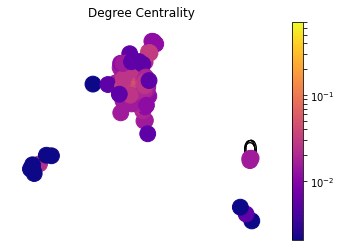

Centralities in descending order by value
pop :  0.7003891050583657
dance pop :  0.5953307392996109
pop rap :  0.5642023346303502
rap :  0.5252918287937743
tropical house :  0.48638132295719844
hip hop :  0.45914396887159536
edm :  0.45525291828793774
post-teen pop :  0.44357976653696496
trap :  0.39299610894941633
southern hip hop :  0.377431906614786
electro house :  0.377431906614786
electropop :  0.3540856031128405
canadian pop :  0.29961089494163423
atl hip hop :  0.24124513618677043
r&b :  0.22957198443579768
latin :  0.2178988326848249
toronto rap :  0.2178988326848249
reggaeton :  0.21400778210116733
melodic rap :  0.21011673151750973
progressive house :  0.21011673151750973
big room :  0.20233463035019456
urban contemporary :  0.18287937743190663
uk dance :  0.17898832684824903
gangster rap :  0.17898832684824903
canadian hip hop :  0.17898832684824903
detroit hip hop :  0.17509727626459143
conscious hip hop :  0.17120622568093385
tropical :  0.16731517509727628
uk pop :  0.16

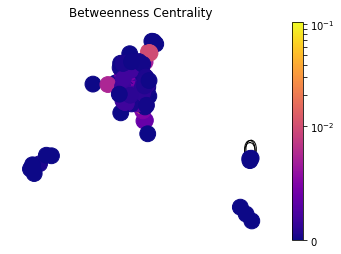

Centralities in descending order by value
pop :  0.10355628148207137
canadian pop :  0.08080980843359929
dance pop :  0.07691469644458296
electropop :  0.05578090938738278
tropical house :  0.04871816136186889
rap :  0.0451056754036173
rock :  0.04074086423416216
edm :  0.040668870295220205
pop rap :  0.03931748473268666
hip hop :  0.03720315406612718
post-teen pop :  0.0367327418800618
electro house :  0.035707781407970984
southern hip hop :  0.020565913067490154
detroit hip hop :  0.017806306510861316
progressive electro house :  0.017266753247226253
trap :  0.016741940162927096
reggaeton :  0.01532655872613154
lounge :  0.014908332084064491
electro latino :  0.01479950426351264
canadian hip hop :  0.013834866221739905
r&b :  0.013365207575398401
latin hip hop :  0.013168744452836462
tropical :  0.012962533910978388
colombian pop :  0.012851850980619386
west coast rap :  0.012283938425456676
boy band :  0.012024485229695249
big room :  0.011884944545160418
toronto rap :  0.0113586172

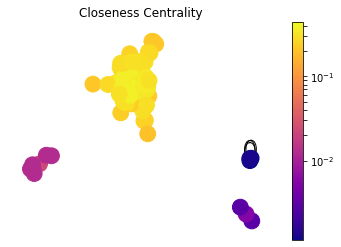

Centralities in descending order by value
dance pop :  0.4370897878276191
electropop :  0.4330048365395105
pop :  0.42979144257632307
canadian pop :  0.42741252315246886
afro dancehall :  0.4227328239938652
afropop :  0.4227328239938652
azonto :  0.4227328239938652
canadian hip hop :  0.4159023115774472
rap :  0.41515696693304327
scandipop :  0.41515696693304327
post-teen pop :  0.4136742634797109
uk funky :  0.41293687620078096
permanent wave :  0.4122021130758685
norwegian pop :  0.41074040345503215
pop rap :  0.410013429289625
electronic trap :  0.410013429289625
swedish electropop :  0.4085671738071219
edm :  0.40713108532273834
canadian contemporary r&b :  0.40641682026076864
canadian electronic :  0.40641682026076864
hip pop :  0.404995782427689
swedish pop :  0.40428898350547665
hip hop :  0.40358464729727894
tropical house :  0.40288276095415326
electro house :  0.40288276095415326
moombahton :  0.40288276095415326
new jersey rap :  0.40288276095415326
southern hip hop :  0.400

In [ ]:
graph_genre = read_genre_dataset("Datasets/Genre Collaboration Network/Original/global/global-genre_network-2017.csv")

pos = nx.spring_layout(graph_genre, seed = 600)
nodes = nx.draw_networkx_nodes(graph_genre, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_genre, pos)
print(graph_genre)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph_genre)
draw(graph_genre, pos, deg_centr, 'Degree Centrality')
sorted_deg = dict( sorted(deg_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_deg:
  print(key, ": ", sorted_deg[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph_genre, weight="weight")
draw(graph_genre, pos, bet_centr, 'Betweenness Centrality')
sorted_bet = dict( sorted(bet_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_bet:
  print(key, ": ", sorted_bet[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_genre, distance = "weight")
draw(graph_genre, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Global 2018



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

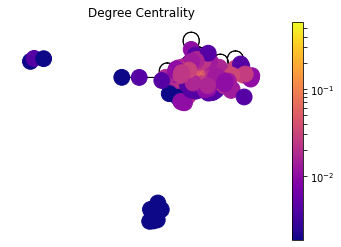

pop rap :  0.4693877551020408
rap :  0.4931972789115646
trap :  0.4183673469387755
hip hop :  0.4115646258503401
latin :  0.2789115646258503
reggaeton :  0.24489795918367346
dance pop :  0.5374149659863945
pop :  0.5816326530612245
post-teen pop :  0.4489795918367347
southern hip hop :  0.3469387755102041
tropical :  0.17346938775510204
tropical house :  0.4013605442176871
atl hip hop :  0.22789115646258504
edm :  0.38095238095238093
trap latino :  0.15986394557823128
reggaeton flow :  0.13945578231292516
melodic rap :  0.22108843537414966
latin hip hop :  0.11224489795918367
electropop :  0.25510204081632654
east coast hip hop :  0.14965986394557823
hardcore hip hop :  0.07142857142857142
gangster rap :  0.18367346938775508
latin pop :  0.17346938775510204
alternative hip hop :  0.11224489795918367
uk pop :  0.21088435374149658
puerto rican pop :  0.11904761904761904
miami hip hop :  0.14285714285714285
electro house :  0.25510204081632654
r&b :  0.17346938775510204
uk dance :  0.1632

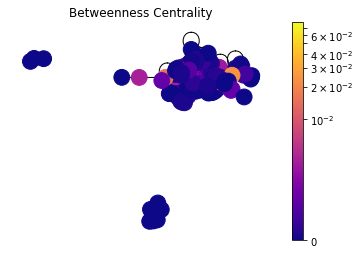

pop rap :  0.03056203793376175
rap :  0.0557726323980559
trap :  0.0411782728720416
hip hop :  0.04154994871921053
latin :  0.04206862472350429
reggaeton :  0.02802377483712795
dance pop :  0.061724346584012074
pop :  0.07831678112633134
post-teen pop :  0.04938577485624924
southern hip hop :  0.020834658278100156
tropical :  0.018206002442499588
tropical house :  0.04059718782934327
atl hip hop :  0.02092826214768638
edm :  0.02979185081069666
trap latino :  0.019952290251758726
reggaeton flow :  0.012280075599201296
melodic rap :  0.008539308025609638
latin hip hop :  0.0060334424630200615
electropop :  0.03649920337537998
east coast hip hop :  0.01050929664025435
hardcore hip hop :  0.0030278055261121874
gangster rap :  0.020418086152661743
latin pop :  0.013069385548373029
alternative hip hop :  0.035823843336308434
uk pop :  0.026221516003940265
puerto rican pop :  0.015271846433740424
miami hip hop :  0.006943355429721547
electro house :  0.029370943447304343
r&b :  0.01177513340

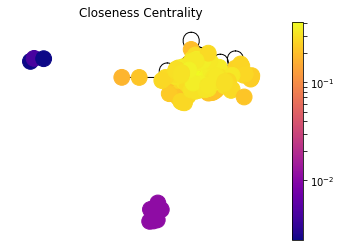

Centralities in descending order by value
tropical :  0.4088526617800622
post-teen pop :  0.4070328428107148
latin pop :  0.40403554647190243
indie pop :  0.40403554647190243
pop :  0.4028489516217647
dance pop :  0.40108207025500253
hip pop :  0.40108207025500253
uk alternative pop :  0.40049654898455733
tropical house :  0.39991273477320954
electropop :  0.3981714601660693
philly rap :  0.3981714601660693
rap :  0.3975944000788721
lgbtq+ hip hop :  0.3947340087113982
edm :  0.3924751588761399
uk dancehall :  0.3919144800777454
uk hip hop :  0.3919144800777454
alternative r&b :  0.39135540093355453
house :  0.3907979146074384
spanish pop :  0.3907979146074384
dutch edm :  0.39024201430216465
gangster rap :  0.3896876932591218
canadian pop :  0.3896876932591218
uk dance :  0.38913494475804505
electro house :  0.38858376211674467
talent show :  0.38858376211674467
deep pop r&b :  0.38858376211674467
brostep :  0.38803413869083697
trap :  0.38693954309509415
pop rock :  0.386939543095094

In [ ]:
graph_genre = read_genre_dataset("Datasets/Genre Collaboration Network/Original/global/global-genre_network-2018.csv")

pos = nx.spring_layout(graph_genre, seed = 600)
nodes = nx.draw_networkx_nodes(graph_genre, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_genre, pos)
print(graph_genre)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph_genre)
draw(graph_genre, pos, deg_centr, 'Degree Centrality')
for key in deg_centr:
  print(key, ": ", deg_centr[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph_genre, weight="weight")
draw(graph_genre, pos, bet_centr, 'Betweenness Centrality')
for key in bet_centr:
  print(key, ": ", bet_centr[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_genre, distance = "weight")
draw(graph_genre, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])



> Global 2019



indice =  0
indice =  1
indice =  2
indice =  3
indice =  4
indice =  5
indice =  6
indice =  7
indice =  8
indice =  9
indice =  10
indice =  11
indice =  12
indice =  13
indice =  14
indice =  15
indice =  16
indice =  17
indice =  18
indice =  19
indice =  20
indice =  21
indice =  22
indice =  23
indice =  24
indice =  25
indice =  26
indice =  27
indice =  28
indice =  29
indice =  30
indice =  31
indice =  32
indice =  33
indice =  34
indice =  35
indice =  36
indice =  37
indice =  38
indice =  39
indice =  40
indice =  41
indice =  42
indice =  43
indice =  44
indice =  45
indice =  46
indice =  47
indice =  48
indice =  49
indice =  50
indice =  51
indice =  52
indice =  53
indice =  54
indice =  55
indice =  56
indice =  57
indice =  58
indice =  59
indice =  60
indice =  61
indice =  62
indice =  63
indice =  64
indice =  65
indice =  66
indice =  67
indice =  68
indice =  69
indice =  70
indice =  71
indice =  72
indice =  73
indice =  74
indice =  75
indice =  76
indice = 

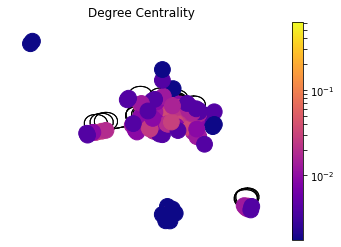

latin :  0.31715210355987056
reggaeton :  0.3009708737864078
pop rap :  0.49190938511326865
rap :  0.4045307443365696
trap :  0.34304207119741104
hip hop :  0.29449838187702265
tropical :  0.20711974110032363
trap latino :  0.21359223300970875
pop :  0.6148867313915858
dance pop :  0.5210355987055016
reggaeton flow :  0.1877022653721683
post-teen pop :  0.44336569579288027
latin hip hop :  0.1941747572815534
tropical house :  0.36245954692556637
southern hip hop :  0.22977346278317154
underground hip hop :  0.13915857605177995
melodic rap :  0.255663430420712
edm :  0.36245954692556637
electropop :  0.2394822006472492
atl hip hop :  0.1877022653721683
trap argentino :  0.08414239482200647
panamanian pop :  0.05177993527508091
latin pop :  0.16181229773462785
colombian pop :  0.10355987055016182
german hip hop :  0.07119741100323625
r&b en espanol :  0.06472491909385114
vapor trap :  0.0970873786407767
nc hip hop :  0.09061488673139159
atl trap :  0.11326860841423948
puerto rican pop : 

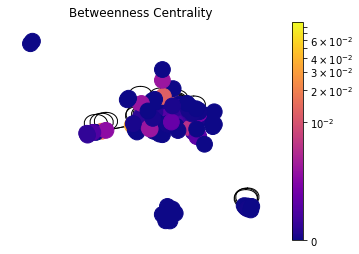

latin :  0.03966748524807482
reggaeton :  0.015252555326411312
pop rap :  0.052337751730315914
rap :  0.008292672961624548
trap :  0.03559413901977669
hip hop :  0.03050555382744647
tropical :  0.0020218373346770962
trap latino :  0.056433316198762615
pop :  0.07685295406375021
dance pop :  0.059290098214068214
reggaeton flow :  0.02778388962941117
post-teen pop :  0.08769799651098627
latin hip hop :  0.03176948037006191
tropical house :  0.03987556650679917
southern hip hop :  0.03231596249268507
underground hip hop :  0.005283591684679448
melodic rap :  0.018340588308623132
edm :  0.025446417098563916
electropop :  0.024220151510239235
atl hip hop :  0.00550452021009669
trap argentino :  0.005487521319268307
panamanian pop :  4.202916824276047e-06
latin pop :  0.033167091867593784
colombian pop :  0.012127728778178798
german hip hop :  0.04272298309049368
r&b en espanol :  0.002438714483486566
vapor trap :  0.0018179815076954991
nc hip hop :  0.002164847967743441
atl trap :  0.004176

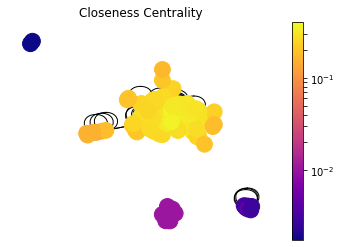

Centralities in descending order by value
post-teen pop :  0.39860613911678805
pop :  0.3963316390362358
uk pop :  0.3940829488856756
dance pop :  0.39352475773994516
progressive electro house :  0.38427175513748446
canadian hip hop :  0.3837409930447531
southern hip hop :  0.3832116951233121
chicago rap :  0.3832116951233121
hip hop :  0.38163252605000175
tropical house :  0.37902930281637287
latin :  0.3785129141204377
pop rock :  0.3785129141204377
dfw rap :  0.37799793056381126
latin hip hop :  0.3769721559896897
video game music :  0.3759519336460099
dutch edm :  0.3749372185754403
trance :  0.3749372185754403
pop rap :  0.3734253749521522
trap :  0.3729241328381225
mexican pop :  0.37192567465113957
trap latino :  0.37043797195253503
edm :  0.3684727837724155
pop argentino :  0.3684727837724155
funk carioca :  0.3674979880481498
deep big room :  0.3665283363646455
baile pop :  0.3660454268305682
afro dancehall :  0.3660454268305682
rock :  0.3655637881110543
dancehall :  0.364604

In [ ]:
graph_genre = read_genre_dataset("Datasets/Genre Collaboration Network/Original/global/global-genre_network-2019.csv")

pos = nx.spring_layout(graph_genre, seed = 600)
nodes = nx.draw_networkx_nodes(graph_genre, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_genre, pos)
print(graph_genre)
print("\n")

#draw Degree Centrality graph
deg_centr = nx.degree_centrality(graph_genre)
draw(graph_genre, pos, deg_centr, 'Degree Centrality')
for key in deg_centr:
  print(key, ": ", deg_centr[key])
print("\n")

#draw Betweenness Centrality graph
bet_centr = nx.betweenness_centrality(graph_genre, weight="weight")
draw(graph_genre, pos, bet_centr, 'Betweenness Centrality')
for key in bet_centr:
  print(key, ": ", bet_centr[key])
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_genre, distance = "weight")
draw(graph_genre, pos, close_centr, 'Closeness Centrality')
sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])

# Hit songs

In [ ]:
'''
Creazione grafo da hit songs  dataset
input format: dict = {song name, [artist id (list), artist name (list), popularity, duration (ms)]}
'''
def create_graph_artists_in_common(dictionary):
    new_graph = nx.Graph()

    song_names = list(dictionary.keys())

    #tot = len(song_names)**2 / 2

    new_graph.add_nodes_from(song_names)

    for i in range(len(song_names)-1):
        values_list_1 = dictionary[song_names[i]]

        #artist_id_1 = values_list_1[0] #list
        artist_name_1 = values_list_1[1] #list
        #popularity_1 = values_list_1[2]

        for j in range(i+1,len(song_names)):
            if song_names[i]!=song_names[j]:

                values_list_2 = dictionary[song_names[j]]

                #artist_id_2 = values_list_2[0] #list
                artist_name_2 = values_list_2[1] #list
                #popularity_2 = values_list_2[2]
                
                common_artists_list = [artist for artist in artist_name_1 if artist in artist_name_2]
                count = len(common_artists_list)

                if count>0:
                    new_graph.add_edge(song_names[i], song_names[j], weight = count, common_artists = common_artists_list)
                    '''if count>1:
                        print("Song 1: ", song_name_1, "| Song 2: ", song_name_2, "| edge weight: ", count, "| common artists: ", common_artists_list)'''
        #print("Iteration: {}".format(i))

    return new_graph

In [ ]:
'''
dict_of_hit_songs = read_song_dataset("Datasets/Hit Songs/spotify_hits_dataset_complete.csv")
graph_test = create_graph_artists_in_common(dict_of_hit_songs)


pos = nx.spring_layout(graph_test, seed = 600)
nodes = nx.draw_networkx_nodes(graph_test, pos, node_size=20)
edges = nx.draw_networkx_edges(graph_test, pos)
print(graph_test)
print("\n")

#draw Degree Centrality graph
draw(graph_test, pos, nx.degree_centrality(graph_test), 'Degree Centrality')
print("\n")

#draw Closeness Centrality graph
close_centr = nx.closeness_centrality(graph_test, distance = "weight")
draw(graph_test, pos, close_centr, 'Closeness Centrality')

sorted_d = dict( sorted(close_centr.items(), key=lambda item: item[1], reverse=True))
print('Centralities in descending order by value')
for key in sorted_d:
  print(key, ": ", sorted_d[key])
'''

In [ ]:
dict_of_hit_songs = read_song_dataset("Datasets/Hit Songs/spotify_hits_dataset_complete.csv")
graph_test = create_graph_artists_in_common(dict_of_hit_songs)
print(graph_test)

Graph with 11136 nodes and 211710 edges


In [ ]:
h = ig.Graph.from_networkx(graph_test)
verteces = h.vs

degree_graph = h.degree()
betweenness_graph = h.betweenness()
closeness_graph = h.closeness()

In [ ]:
degree_dict={}
betweenness_dict={}
closeness_dict={}

for i in range(len(verteces)):
  song_name = verteces[i]['_nx_name']
  degree_dict[song_name] = degree_graph[i]
  betweenness_dict[song_name] = betweenness_graph[i]
  closeness_dict[song_name] = closeness_graph[i]

sorted_deg = dict( sorted(degree_dict.items(), key=lambda item: item[1], reverse=True))
sorted_bet = dict( sorted(betweenness_dict.items(), key=lambda item: item[1], reverse=True))
sorted_clo = dict( sorted(closeness_dict.items(), key=lambda item: item[1], reverse=True))

In [ ]:
i = 0
for key in sorted_deg:
  i+=1
  print(key, ": ", sorted_deg[key])
  if i==250:
    break

Sturmmaske auf - Gold war gestern RMX :  290
Champions :  278
Down for Life (feat. PARTYNEXTDOOR, Future, Travis Scott, Rick Ross & Kodak Black) :  269
Woah :  256
Jusqu'à minuit (feat. JuL) :  252
Et je deviens fou :  252
Tel Me :  252
Iced Out My Arms (feat. Future, Migos, 21 Savage & T.I.) :  247
J'suis loin :  247
Waffen :  246
Royal Rumble :  242
Portland :  235
Über Nacht :  223
Erober die Welt :  223
Ma chérie :  221
Used to This (feat. Drake) :  220
Jumpman :  220
Congratulations - Remix :  219
White Sand :  211
End Game :  210
Cagoulé :  210
Je ne comprends pas :  210
Ain't Livin Right (feat. Gunna) :  209
Ne crois pas que c'est drôle :  208
Patek Water (feat. Offset) :  208
High Life :  207
Quelqu'un d'autre t'aimera :  207
Oh fou :  207
Sur la moto :  207
Splash Warning (feat. Future, Roddy Ricch and Young Thug) :  207
Kontrollieren :  205
X (feat. Future) :  205
T'es pas la même :  204
Red Bentley (feat. Young Thug) :  204
Roli Glitzer Glitzer (feat. Luciano & Eno) :  204
G

In [ ]:
i = 0
for key in sorted_bet:
  i+=1
  print(key, ": ", sorted_bet[key])
  if i==250:
    break

Réseaux - Remix :  1897679.0261425327
Afro Trap Pt. 7 (La puissance) - Major Lazer Remix :  1436527.456921934
INTERNATIONAL GANGSTAS :  1431627.215702073
Olha A Explosão - Remix :  1381397.4903589592
Fendi Drip :  1294950.078955294
Maghreb Gang (feat. French Montana, Khaled & HAMZA) - Saucegod Remix :  1291691.7068618177
Hola Señorita :  1118600.484072122
A.W.A :  1050231.5341256366
VVS :  972136.4925191135
I Like It (feat. Kontra K and AK Ausserkontrolle) :  952157.7769870762
Es Rollt :  794506.952299469
Baui Coupé :  752887.6445185173
Some que ele vem atrás :  744715.7678976791
Perfekt (feat. RAF Camora, Sofiane & Dardan) - Remix :  698744.510484143
Malokera (feat. Ludmilla, Ty Dolla $ign) :  684688.5028383173
Never Personal :  654267.5112282502
Boom Bye Bye :  653004.2744033125
Tout est bon :  615002.0
Maléfique :  606410.0
Maghreb Gang (feat. French Montana & Khaled) :  581882.5218851394
Sans thème - Remix :  562382.6015425842
Weiß maskiert :  541716.7052480091
Perfekt (feat. Sofia

In [ ]:
i = 0
for key in sorted_clo:
  i+=1
  print(key, ": ", sorted_clo[key])
  if i==250:
    break

Show You :  1.0
Fantastic Boy :  1.0
Dans mon nuage :  1.0
Main Title "Somewhere in My Memory" (From "Home Alone") - Voice :  1.0
Bulma :  1.0
Pankani :  1.0
Good Love (feat. Tory Lanez) :  0.2711269791990065
Find Me :  nan
Côte Ouest :  1.0
Pardonne-moi :  1.0
DIAMANT :  1.0
紙飛行機 :  1.0
You Were Right :  1.0
Pour les jaja :  1.0
GONG :  1.0
At Christmas :  1.0
Wünsch mir was :  1.0
Dieses Leben :  1.0
Makeba - Radio Edit :  1.0
Am Ende :  1.0
Even Though I'm Leaving :  1.0
Ay-Oh - Live Aid :  1.0
Ma bulle :  1.0
The Less I Know The Better :  1.0
Blue Christmas :  0.7647058823529411
Winter Wonderland / Don't Worry Be Happy (feat. Tori Kelly) :  0.75
Work REMIX (feat. A$AP Rocky, French Montana, Trinidad James & ScHoolboy Q) :  0.2942088063874945
Es Rollt :  0.2870431238495924
Nummer :  0.26973684210526316
Wavy (feat. Joe Moses) :  0.2693458347469389
Icy (feat. Gucci Mane) :  0.2671867829279486
Signs :  0.2667134960144153
J'suis dans l'baye :  0.26573149951314506
Jonestown (Interlude) :